<a href="https://colab.research.google.com/github/satriobayutirto/Pyspark-data-export-import-india/blob/main/Indian_trade_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
categories = {
    "Animal Products": [
        'LIVE ANIMALS.',
        'PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEANS, MOLLUSCS OR OTHER AQUATIC INVERTEBRATES',
        'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.',
        'MEAT AND EDIBLE MEAT OFFAL.',
        "DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED.",
        'PREPARED FEATHERS AND DOWN AND ARTICLES MADE OF FEATHERS OR OF DOWN; ARTIFICIAL FLOWERS; ARTICLES OF HUMAN HAIR.',
        'WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YARN AND WOVEN FABRIC.'
    ],
    "Vegetable Products": [
        'EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.',
        'EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.',
        'OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEEDS AND FRUIT; INDUSTRIAL OR MEDICINAL PLANTS; STRAW AND FODDER.',
        'VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.',
        'PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTHER PARTS OF PLANTS.',
        'LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND EXTRACTS.'
    ],
    "Textile and Apparel Products": [
        'SILK',
        'MAN-MADE FILAMENTS.',
        'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.',
        'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.',
        'OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS',
        'CARPETS AND OTHER TEXTILE FLOOR COVERINGS.',
        'SPECIAL WOVEN FABRICS; TUFTED TEXTILE FABRICS; LACE; TAPESTRIES; TRIMMINGS; EMBROIDERY.',
        'KNITTED OR CROCHETED FABRICS.',
        'COTTON.',
        'OTHER VEGETABLE TEXTILE FIBRES; PAPER YARN AND WOVEN FABRICS OF PAPER YARN.',
        'IMPREGNATED, COATED, COVERED OR LAMINATED TEXTILE FABRICS; TEXTILE ARTICLES OF A KIND SUITABLE FOR INDUSTRIAL USE.'
    ],
    "Chemical Products": [
        'ORGANIC CHEMICALS',
        'INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPOUNDS OF PRECIOUS METALS, OF RARE-EARTH METALS, OR RADI. ELEM. OR OF ISOTOPES.',
        'MISCELLANEOUS CHEMICAL PRODUCTS.',
        'FERTILISERS.',
        'EXPLOSIVES; PYROTECHNIC PRODUCTS; MATCHES; PYROPHORIC ALLOYS; CERTAIN COMBUSTIBLE PREPARATIONS.',
        'ESSENTIAL OILS AND RESINOIDS; PERFUMERY, COSMETIC OR TOILET PREPARATIONS.',
        'SOAP, ORGANIC SURFACE-ACTIVE AGENTS, WASHING PREPARATIONS, LUBRICATING PREPARATIONS, ARTIFICIAL WAXES, PREPARED WAXES, POLISHING OR SCOURING PREP.'
    ],
    "Metal Products": [
        'ARTICLES OF IRON OR STEEL',
        'IRON AND STEEL',
        'ALUMINIUM AND ARTICLES THEREOF.',
        'COPPER AND ARTICLES THEREOF.',
        'ZINC AND ARTICLES THEREOF.',
        'LEAD AND ARTICLES THEREOF.',
        'TIN AND ARTICLES THEREOF.',
        'MISCELLANEOUS ARTICLES OF BASE METAL.',
        'OTHER BASE METALS; CERMETS; ARTICLES THEREOF.'
    ],
    "Machinery and Electronics": [
        'NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.',
        'ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS, AND PARTS.',
        'RAILWAY OR TRAMWAY LOCOMOTIVES, ROLLING-STOCK AND PARTS THEREOF; RAILWAY OR TRAMWAY TRACK FIXTURES AND FITTINGS AND PARTS THEREOF; MECHANICAL',
        'AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.',
        'TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, OF BASE METAL; PARTS THEREOF OF BASE METAL.'
    ],
    "Mineral and Fuel Products": [
        'MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.',
        'ORES, SLAG AND ASH.',
        'SALT; SULPHUR; EARTHS AND STONE; PLASTERING MATERIALS, LIME AND CEMENT.'
    ],
    "Food and Beverages": [
        'CEREALS.',
        'COFFEE, TEA, MATE AND SPICES.',
        'SUGARS AND SUGAR CONFECTIONERY.',
        'COCOA AND COCOA PREPARATIONS.',
        'PREPARATIONS OF CEREALS, FLOUR, STARCH OR MILK; PASTRYCOOKS PRODUCTS.',
        'MISCELLANEOUS EDIBLE PREPARATIONS.',
        'BEVERAGES, SPIRITS AND VINEGAR.',
        'RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; PREPARED ANIMAL FODER.'
    ],
    "Wood and Paper Products": [
        'WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.',
        'PAPER AND PAPERBOARD; ARTICLES OF PAPER PULP, OF PAPER OR OF PAPERBOARD.',
        'PULP OF WOOD OR OF OTHER FIBROUS CELLULOSIC MATERIAL; WASTE AND SCRAP OF PAPER OR PAPERBOARD.'
    ],
    "Leather and Animal Skin Products": [
        'RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER',
        'ARTICLES OF LEATHER,SADDLERY AND HARNESS;TRAVEL GOODS, HANDBAGS AND SIMILAR CONT.ARTICLES OF ANIMAL GUT(OTHR THN SILK-WRM)GUT.',
        'FURSKINS AND ARTIFICIAL FUR, MANUFACTURES THEREOF.'
    ],
    "Plastic and Rubber Products": [
        'PLASTIC AND ARTICLES THEREOF.',
        'RUBBER AND ARTICLES THEREOF.'
    ],
    "Miscellaneous": [
        'PROJECT GOODS; SOME SPECIAL USES.',
        'PHOTOGRAPHIC OR CINEMATOGRAPHIC GOODS.',
        'CLOCKS AND WATCHES AND PARTS THEREOF.',
        'MISCELLANEOUS MANUFACTURED ARTICLES.',
        "WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.",
        'TOYS, GAMES AND SPORTS REQUISITES; PARTS AND ACCESSORIES THEREOF.',
        'MUSICAL INSTRUMENTS; PARTS AND ACCESSORIES OF SUCH ARTICLES.',
        'HEADGEAR AND PARTS THEREOF.',
        'FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPORTS, CUSHIONS AND SIMILAR STUFFED FURNISHING; LAMPS AND LIGHTING FITTINGS NOT ELSEWHERE SPECIFIED OR INC'
    ]
}
w

# install

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName("IndianTradeAnalysis").getOrCreate()

# Load CSV file
df = spark.read.csv("path_to_your_csv_file.csv", header=True, inferSchema=True)

# Extract unique commodity categories
unique_commodities = df.select("Commodity").distinct().rdd.flatMap(lambda x: x).collect()

# Define category groups (you'll need to adjust these based on your specific categories)
category_groups = {
    "Food": ["EDIBLE VEGETABLES", "EDIBLE FRUIT AND NUTS", "COFFEE, TEA, MATE AND SPICES"],
    "Seeds": ["OIL SEEDS AND OLEA"],
    "Materials": ["LAC; GUMS, RESINS"]
    # Add more categories as needed
}

# Create boolean columns for each category group
for category, items in category_groups.items():
    df = df.withColumn(category, when(col("Commodity").isin(items), True).otherwise(False))

# Calculate sum of values for each category
category_sums = df.groupBy().agg(*[sum(when(col(category), col("value")).otherwise(0)).alias(category) for category in category_groups.keys()])

# Collect results for plotting
category_data = category_sums.toPandas().iloc[0].to_dict()

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_data.keys(), category_data.values())
plt.title("Sum of Values by Category")
plt.xlabel("Category")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stop Spark Session
spark.stop()

ModuleNotFoundError: No module named 'pyspark'

In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark


In [2]:
# Install pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=80bc4e589519e96a9a415276b37f68ffe70412373d152ae8c751ef78d2d22fb8
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when
import matplotlib.pyplot as plt

#Start Session

In [5]:
# Initialize Spark Session
spark = SparkSession.builder.appName("IndianTradeAnalysis").getOrCreate()

In [6]:
edf=spark.read.csv("/content/drive/MyDrive/Indian Trade/2010_2021_HS2_export.csv", header=True, inferSchema=True)
idf=spark.read.csv("/content/drive/MyDrive/Indian Trade/2010_2021_HS2_import.csv", header=True, inferSchema=True)

In [8]:
duplicates = idf.groupBy(idf.columns).count().filter("count > 1")
duplicates.show()

+------+---------+-----+-------+----+-----+
|HSCode|Commodity|value|country|year|count|
+------+---------+-----+-------+----+-----+
+------+---------+-----+-------+----+-----+



In [ ]:
# Drop duplicates based on all columns
df_no_duplicates = df.dropDuplicates()

# Drop duplicates based on specific columns
df_no_duplicates_specific = df.dropDuplicates(["name", "id"])

# Show the result
df_no_duplicates.show()


In [12]:

# Menghitung jumlah null di setiap kolom
null_counts =idf.select([sum(col(c).isNull().cast("int")).alias(c) for c in idf.columns])

# Menampilkan hasilnya
null_counts.show()

+------+---------+-----+-------+----+
|HSCode|Commodity|value|country|year|
+------+---------+-----+-------+----+
|     0|        0|15745|      0|   0|
+------+---------+-----+-------+----+



In [17]:
# Total jumlah baris dalam DataFrame
total_rows = idf.count()

# Menghitung persentase null di setiap kolom
null_percentages = idf.select([(sum(col(c).isNull().cast("int")) / total_rows * 100).alias(c) for c in idf.columns])

# Menampilkan hasilnya
null_percentages.show()

+------+---------+------------------+-------+----+
|HSCode|Commodity|             value|country|year|
+------+---------+------------------+-------+----+
|   0.0|      0.0|15.581241155456155|    0.0| 0.0|
+------+---------+------------------+-------+----+



In [18]:
total_rows

101051

15 persen


In [9]:
duplicates = edf.groupBy(edf.columns).count().filter("count > 1")
duplicates.show()

+------+---------+-----+-------+----+-----+
|HSCode|Commodity|value|country|year|count|
+------+---------+-----+-------+----+-----+
+------+---------+-----+-------+----+-----+



In [ ]:
# Drop duplicates based on all columns
df_no_duplicates = df.dropDuplicates()

# Drop duplicates based on specific columns
df_no_duplicates_specific = df.dropDuplicates(["name", "id"])

# Show the result
df_no_duplicates.show()


In [13]:

# Menghitung jumlah null di setiap kolom
null_counts =edf.select([sum(col(c).isNull().cast("int")).alias(c) for c in edf.columns])

# Menampilkan hasilnya
null_counts.show()

+------+---------+-----+-------+----+
|HSCode|Commodity|value|country|year|
+------+---------+-----+-------+----+
|     0|        0|19258|      0|   0|
+------+---------+-----+-------+----+



In [19]:
# Total jumlah baris dalam DataFrame
total_rows = edf.count()

# Menghitung persentase null di setiap kolom
null_percentages = edf.select([(sum(col(c).isNull().cast("int")) / total_rows * 100).alias(c) for c in edf.columns])

# Menampilkan hasilnya
null_percentages.show()

+------+---------+------------------+-------+----+
|HSCode|Commodity|             value|country|year|
+------+---------+------------------+-------+----+
|   0.0|      0.0|10.423533869178101|    0.0| 0.0|
+------+---------+------------------+-------+----+



10 persen terakhir

In [20]:
total_rows

184755

In [ ]:
# Check for nulls across all columns
df.select([col(c).isNull().alias(c) for c in df.columns]).show()


#Take commodity list


In [21]:
# Mengambil komoditas unik dari edf dan idf
unique_commodities = edf.select("Commodity").union(idf.select("Commodity")).distinct()

# Mengonversi hasil ke bentuk list menggunakan RDD dan flatMap
unique_commodities_list = unique_commodities.rdd.flatMap(lambda x: x).collect()

# Menampilkan hasil komoditas unik
print(unique_commodities_list)

['LIVE ANIMALS.', 'SILK', 'MAN-MADE FILAMENTS.', 'PROJECT GOODS; SOME SPECIAL USES.', 'SHIPS, BOATS AND FLOATING STRUCTURES.', 'ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.', 'PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEANS, MOLLUSCS OR OTHER AQUATIC INVERTEBRATES', 'OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS', 'MISCELLANEOUS EDIBLE PREPARATIONS.', 'ARTICLES OF LEATHER,SADDLERY AND HARNESS;TRAVEL GOODS, HANDBAGS AND SIMILAR CONT.ARTICLES OF ANIMAL GUT(OTHR THN SILK-WRM)GUT.', 'ARTICLES OF IRON OR STEEL', 'COPPER AND ARTICLES THEREOF.', 'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.', 'OTHER VEGETABLE TEXTILE FIBRES; PAPER YARN AND WOVEN FABRICS OF PAPER YARN.', 'MISCELLANEOUS CHEMICAL PRODUCTS.', 'CARPETS AND OTHER TEXTILE FLOOR COVERINGS.', 'PREPARED FEATHERS AND DOWN AND ARTICLES MADE OF FEATHERS OR OF DOWN; ARTIFICIAL FLOWERS; ARTICLES OF HUMAN HAIR.', 'RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER', 'MISC

In [ ]:
['LIVE ANIMALS.', 'SILK', 'MAN-MADE FILAMENTS.', 'PROJECT GOODS; SOME SPECIAL USES.', 'SHIPS, BOATS AND FLOATING STRUCTURES.',
 'ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.',
 'PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEANS, MOLLUSCS OR OTHER AQUATIC INVERTEBRATES',
 'OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS', 'MISCELLANEOUS EDIBLE PREPARATIONS.',
 'ARTICLES OF LEATHER,SADDLERY AND HARNESS;TRAVEL GOODS, HANDBAGS AND SIMILAR CONT.ARTICLES OF ANIMAL GUT(OTHR THN SILK-WRM)GUT.',
 'ARTICLES OF IRON OR STEEL', 'COPPER AND ARTICLES THEREOF.', 'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.',
 'OTHER VEGETABLE TEXTILE FIBRES; PAPER YARN AND WOVEN FABRICS OF PAPER YARN.', 'MISCELLANEOUS CHEMICAL PRODUCTS.',
 'CARPETS AND OTHER TEXTILE FLOOR COVERINGS.',
 'PREPARED FEATHERS AND DOWN AND ARTICLES MADE OF FEATHERS OR OF DOWN; ARTIFICIAL FLOWERS; ARTICLES OF HUMAN HAIR.',
 'RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER', 'MISCELLANEOUS ARTICLES OF BASE METAL.', 'ALUMINIUM AND ARTICLES THEREOF.',
 'IMPREGNATED, COATED, COVERED OR LAMINATED TEXTILE FABRICS; TEXTILE ARTICLES OF A KIND SUITABLE FOR INDUSTRIAL USE.',
 'FOOTWEAR, GAITERS AND THE LIKE; PARTS OF SUCH ARTICLES.', 'ARTICLES OF STONE, PLASTER, CEMENT, ASBESTOS, MICA OR SIMILAR MATERIALS.',
 'PULP OF WOOD OR OF OTHER FIBROUS CELLULOSIC MATERIAL; WASTE AND SCRAP OF PAPER OR PAPERBOARD.',
 'FURSKINS AND ARTIFICIAL FUR, MANUFACTURES THEREOF.',
 'OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEEDS AND FRUIT; INDUSTRIAL OR MEDICINAL PLANTS; STRAW AND FODDER.',
 'ORGANIC CHEMICALS', 'ZINC AND ARTICLES THEREOF.', 'GLASS AND GLASSWARE.', 'CEREALS.',
 'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.',
 'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.',
 'ESSENTIAL OILS AND RESINOIDS; PERFUMERY, COSMETIC OR TOILET PREPARATIONS.', 'MAN-MADE STAPLE FIBRES.',
 'UMBRELLAS, SUN UMBRELLAS, WALKING-STICKS, SEAT-STICKS, WHIPS,RIDING-CROPS AND PARTS THEREOF.',
 'NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.', 'IRON AND STEEL', 'FERTILISERS.',
 'RAILWAY OR TRAMWAY LOCOMOTIVES, ROLLING-STOCK AND PARTS THEREOF; RAILWAY OR TRAMWAY TRACK FIXTURES AND FITTINGS AND PARTS THEREOF; MECHANICAL',
 "WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.", 'TOYS, GAMES AND SPORTS REQUISITES; PARTS AND ACCESSORIES THEREOF.',
 'FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.', 'MUSICAL INSTRUMENTS; PARTS AND ACCESSORIES OF SUCH ARTICLES.',
 'ORES, SLAG AND ASH.', 'EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.', 'HEADGEAR AND PARTS THEREOF.',
 'EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.', 'PAPER AND PAPERBOARD; ARTICLES OF PAPER PULP, OF PAPER OR OF PAPERBOARD.',
 'MEAT AND EDIBLE MEAT OFFAL.', 'WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YARN AND WOVEN FABRIC.',
 'PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCHES; INULIN; WHEAT GLUTEN.', 'COCOA AND COCOA PREPARATIONS.',
 'SPECIAL WOVEN FABRICS; TUFTED TEXTILE FABRICS; LACE; TAPESTRIES; TRIMMINGS; EMBROIDERY.', 'LEAD AND ARTICLES THEREOF.',
 'PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER PRODUCTS OF THE PRINTING INDUSTRY; MANUSCRIPTS, TYPESCRIPTS AND PLANS.',
 'INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPOUNDS OF PRECIOUS METALS, OF RARE-EARTH METALS, OR RADI. ELEM. OR OF ISOTOPES.',
 'MANUFACTURES OF STRAW, OF ESPARTO OR OF OTHER PLAITING MATERIALS; BASKETWARE AND WICKERWORK.',
 'MISCELLANEOUS MANUFACTURED ARTICLES.', 'PHOTOGRAPHIC OR CINEMATOGRAPHIC GOODS.',
 'ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.',
 'MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.', 'CORK AND ARTICLES OF CORK.',
 'RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; PREPARED ANIMAL FODER.', 'PLASTIC AND ARTICLES THEREOF.',
 'WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.', 'TIN AND ARTICLES THEREOF.',
 'ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.',
 'SALT; SULPHUR; EARTHS AND STONE; PLASTERING MATERIALS, LIME AND CEMENT.',
 'TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, OF BASE METAL; PARTS THEREOF OF BASE METAL.', 'CERAMIC PRODUCTS.',
 'OTHER BASE METALS; CERMETS; ARTICLES THEREOF.',
  'NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.',
  'KNITTED OR CROCHETED FABRICS.', 'TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES.', 'AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.',
  'MISCELLANEOUS GOODS.', 'PHARMACEUTICAL PRODUCTS',
  "DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED.",
  'BEVERAGES, SPIRITS AND VINEGAR.', 'NICKEL AND ARTICLES THEREOF.',
  'OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;',
 'LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND THE LIKE; CUT FLOWERS AND ORNAMENTAL FOLIAGE.',
 'PREPARATIONS OF CEREALS, FLOUR, STARCH OR MILK; PASTRYCOOKS PRODUCTS.', 'ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLUES; ENZYMES.',
 'PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTHER PARTS OF PLANTS.', 'CLOCKS AND WATCHES AND PARTS THEREOF.',
 'LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND EXTRACTS.', 'COFFEE, TEA, MATE AND SPICES.',
 'VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.',
 'SOAP, ORGANIC SURFACE-ACTIVE AGENTS, WASHING PREPARATIONS, LUBRICATING PREPARATIONS, ARTIFICIAL WAXES, PREPARED WAXES, POLISHING OR SCOURING PREP.',
 'WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TWINE, CORDAGE, ROPES AND CABLES AND ARTICLES THEREOF.',
 'EXPLOSIVES; PYROTECHNIC PRODUCTS; MATCHES; PYROPHORIC ALLOYS; CERTAIN COMBUSTIBLE PREPARATIONS.', 'RUBBER AND ARTICLES THEREOF.',
 'COTTON.', 'FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPORTS, CUSHIONS AND SIMILAR STUFFED FURNISHING; LAMPS AND LIGHTING FITTINGS NOT ELSEWHERE SPECIFIED OR INC',
 'SUGARS AND SUGAR CONFECTIONERY.', 'VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.']

In [ ]:
# Daftar awal
commodities = ['LIVE ANIMALS', 'SILK', 'MAN-MADE FILAMENTS', 'PROJECT GOODS', 'SHIPS, BOATS AND FLOATING STRUCTURES',
 'ARMS AND AMMUNITION', 'PREPARATIONS OF MEAT, OF FISH', 'ARTICLES OF LEATHER', 'MISCELLANEOUS EDIBLE PREPARATIONS',
 'ARTICLES OF IRON OR STEEL', 'COPPER AND ARTICLES THEREOF', 'ARTICLES OF APPAREL', 'OTHER VEGETABLE TEXTILE FIBRES',
 'MISCELLANEOUS CHEMICAL PRODUCTS', 'CARPETS AND OTHER TEXTILE FLOOR COVERINGS', 'PREPARED FEATHERS AND DOWN',
 'RAW HIDES AND SKINS', 'MISCELLANEOUS ARTICLES OF BASE METAL', 'ALUMINIUM AND ARTICLES THEREOF',
 'IMPREGNATED, COATED, COVERED OR LAMINATED TEXTILE FABRICS', 'FOOTWEAR, GAITERS AND THE LIKE',
 'ARTICLES OF STONE, PLASTER, CEMENT, ASBESTOS', 'PULP OF WOOD OR OTHER FIBROUS CELLULOSIC MATERIAL',
 'FURSKINS AND ARTIFICIAL FUR', 'OIL SEEDS AND OLEAGINOUS FRUITS', 'ORGANIC CHEMICALS', 'ZINC AND ARTICLES THEREOF',
 'GLASS AND GLASSWARE', 'CEREALS', 'ARTICLES OF CLOTHING', 'PRODUCTS OF ANIMAL ORIGIN', 'ESSENTIAL OILS AND RESINOIDS',
 'MAN-MADE STAPLE FIBRES', 'UMBRELLAS, SUN UMBRELLAS', 'NUCLEAR REACTORS, BOILERS', 'IRON AND STEEL', 'FERTILISERS',
 'RAILWAY OR TRAMWAY LOCOMOTIVES', 'WORKS OF ART', 'TOYS, GAMES AND SPORTS REQUISITES', 'FISH AND CRUSTACEANS',
 'MUSICAL INSTRUMENTS', 'ORES, SLAG AND ASH', 'EDIBLE VEGETABLES', 'HEADGEAR AND PARTS THEREOF', 'EDIBLE FRUIT AND NUTS',
 'PAPER AND PAPERBOARD', 'MEAT AND EDIBLE MEAT OFFAL', 'WOOL, FINE OR COARSE ANIMAL HAIR', 'PRODUCTS OF THE MILLING INDUSTRY',
 'COCOA AND COCOA PREPARATIONS', 'SPECIAL WOVEN FABRICS', 'LEAD AND ARTICLES THEREOF', 'PRINTED BOOKS, NEWSPAPERS',
 'INORGANIC CHEMICALS', 'MANUFACTURES OF STRAW', 'MISCELLANEOUS MANUFACTURED ARTICLES', 'PHOTOGRAPHIC GOODS',
 'ANIMAL OR VEGETABLE FATS AND OILS', 'MINERAL FUELS, MINERAL OILS', 'CORK AND ARTICLES OF CORK',
 'RESIDUES AND WASTE FROM THE FOOD INDUSTRIES', 'PLASTIC AND ARTICLES THEREOF', 'WOOD AND ARTICLES OF WOOD',
 'TIN AND ARTICLES THEREOF', 'ELECTRICAL MACHINERY', 'SALT; SULPHUR; EARTHS AND STONE', 'TOOLS IMPLEMENTS, CUTLERY',
 'CERAMIC PRODUCTS', 'OTHER BASE METALS', 'NATURAL OR CULTURED PEARLS', 'KNITTED OR CROCHETED FABRICS', 'TOBACCO',
 'AIRCRAFT, SPACECRAFT', 'MISCELLANEOUS GOODS', 'PHARMACEUTICAL PRODUCTS', 'DAIRY PRODUCE', 'BEVERAGES', 'NICKEL',
 'OPTICAL, PHOTOGRAPHIC', 'LIVE TREES AND OTHER PLANTS', 'PREPARATIONS OF CEREALS', 'ALBUMINOIDAL SUBSTANCES',
 'PREPARATIONS OF VEGETABLES', 'CLOCKS AND WATCHES', 'LAC; GUMS, RESINS', 'COFFEE, TEA', 'VEGETABLE PLAITING MATERIALS',
 'SOAP, ORGANIC SURFACE-ACTIVE AGENTS', 'WADDING, FELT AND NONWOVENS', 'EXPLOSIVES; PYROTECHNIC PRODUCTS',
 'RUBBER AND ARTICLES THEREOF', 'COTTON', 'FURNITURE', 'SUGARS AND SUGAR CONFECTIONERY', 'VEHICLES OTHER THAN RAILWAY']

# Pisahkan setiap item menjadi kata-kata dan hapus duplikat
words = set(word for item in commodities for word in item.replace(",", "").replace(";", "").split())

# Hasil akhir dengan kata-kata unik
print(words)


{'SLAG', 'UMBRELLAS', 'STRAW', 'WOVEN', 'WATCHES', 'MATERIAL', 'BOOKS', 'FURSKINS', 'ANIMAL', 'CHEMICAL', 'SUGARS', 'SPECIAL', 'FROM', 'CLOCKS', 'PHOTOGRAPHIC', 'PLASTER', 'PLAITING', 'ARMS', 'MILLING', 'ORES', 'GUMS', 'APPAREL', 'SUN', 'BOILERS', 'LOCOMOTIVES', 'NATURAL', 'WADDING', 'LIVE', 'OF', 'TRAMWAY', 'LEAD', 'COFFEE', 'CLOTHING', 'FUELS', 'TOOLS', 'FILAMENTS', 'COPPER', 'PARTS', 'CRUSTACEANS', 'CORK', 'VEHICLES', 'SURFACE-ACTIVE', 'AND', 'ELECTRICAL', 'NEWSPAPERS', 'SUBSTANCES', 'CELLULOSIC', 'STAPLE', 'OIL', 'MANUFACTURED', 'COATED', 'SKINS', 'ASH', 'PRODUCTS', 'SPACECRAFT', 'HIDES', 'RESINS', 'SOAP', 'CHEMICALS', 'FISH', 'OFFAL', 'STONE', 'STRUCTURES', 'PLANTS', 'BASE', 'MAN-MADE', 'GAITERS', 'FOOD', 'IRON', 'MISCELLANEOUS', 'PYROTECHNIC', 'ALUMINIUM', 'BOATS', 'IMPREGNATED', 'VEGETABLE', 'FIBROUS', 'INDUSTRY', 'BEVERAGES', 'SUGAR', 'WORKS', 'FOOTWEAR', 'PREPARATIONS', 'FINE', 'CULTURED', 'FLOATING', 'CEREALS', 'LAC', 'PEARLS', 'INORGANIC', 'TREES', 'WOOL', 'NICKEL', 'TOYS', 

In [ ]:
{'SLAG', 'UMBRELLAS', 'STRAW', 'WOVEN', 'WATCHES', 'MATERIAL', 'BOOKS', 'FURSKINS', 'ANIMAL', 'CHEMICAL', 'SUGARS', 'SPECIAL', 'FROM', 'CLOCKS',
 'PHOTOGRAPHIC', 'PLASTER', 'PLAITING', 'ARMS', 'MILLING', 'ORES', 'GUMS', 'APPAREL', 'SUN', 'BOILERS', 'LOCOMOTIVES', 'NATURAL', 'WADDING', 'LIVE',
 'OF', 'TRAMWAY', 'LEAD', 'COFFEE', 'CLOTHING', 'FUELS', 'TOOLS', 'FILAMENTS', 'COPPER', 'PARTS', 'CRUSTACEANS', 'CORK', 'VEHICLES', 'SURFACE-ACTIVE',
 'AND', 'ELECTRICAL', 'NEWSPAPERS', 'SUBSTANCES', 'CELLULOSIC', 'STAPLE', 'OIL', 'MANUFACTURED', 'COATED', 'SKINS', 'ASH', 'PRODUCTS', 'SPACECRAFT',
 'HIDES', 'RESINS', 'SOAP', 'CHEMICALS', 'FISH', 'OFFAL', 'STONE', 'STRUCTURES', 'PLANTS', 'BASE', 'MAN-MADE', 'GAITERS', 'FOOD', 'IRON', 'MISCELLANEOUS',
 'PYROTECHNIC', 'ALUMINIUM', 'BOATS', 'IMPREGNATED', 'VEGETABLE', 'FIBROUS', 'INDUSTRY', 'BEVERAGES', 'SUGAR', 'WORKS', 'FOOTWEAR', 'PREPARATIONS'
 , 'FINE', 'CULTURED', 'FLOATING', 'CEREALS', 'LAC', 'PEARLS', 'INORGANIC', 'TREES', 'WOOL', 'NICKEL', 'TOYS', 'OPTICAL', 'EDIBLE', 'CEMENT', 'COVERINGS'
 , 'RUBBER', 'OR', 'DAIRY', 'TEA', 'ASBESTOS', 'PRINTED', 'METAL', 'ART', 'HEADGEAR', 'INDUSTRIES', 'REQUISITES', 'CONFECTIONERY', 'CROCHETED', 'SHIPS',
 'LAMINATED', 'PULP', 'CERAMIC', 'GLASSWARE', 'MUSICAL', 'ANIMALS', 'MINERAL', 'COVERED', 'SEEDS', 'ORGANIC', 'LEATHER', 'FELT', 'SALT', 'AMMUNITION',
 'RESINOIDS', 'DOWN', 'NONWOVENS', 'TEXTILE', 'FATS', 'THE', 'NUCLEAR', 'AGENTS', 'AIRCRAFT', 'PHARMACEUTICAL', 'TOBACCO', 'ZINC', 'WOOD', 'GOODS',
 'KNITTED', 'OILS', 'MEAT', 'ALBUMINOIDAL', 'SULPHUR', 'MATERIALS', 'MANUFACTURES', 'CARPETS', 'PRODUCE', 'COARSE', 'METALS', 'HAIR', 'PAPERBOARD',
 'ARTICLES', 'NUTS', 'FEATHERS', 'RAILWAY', 'FABRICS', 'LIKE', 'TIN', 'EXPLOSIVES', 'FUR', 'COTTON', 'FERTILISERS', 'MACHINERY', 'REACTORS', 'IMPLEMENTS',
 'THAN', 'FRUITS', 'FLOOR', 'GAMES', 'COCOA', 'PREPARED', 'FIBRES', 'GLASS', 'INSTRUMENTS', 'PROJECT', 'SILK', 'OLEAGINOUS', 'ESSENTIAL', 'EARTHS',
 'FURNITURE', 'CUTLERY', 'PAPER', 'RESIDUES', 'VEGETABLES', 'ARTIFICIAL', 'RAW', 'THEREOF', 'OTHER', 'FRUIT', 'PLASTIC', 'WASTE', 'STEEL', 'ORIGIN', 'SPORTS'}

# Make Category groups

In [22]:
category_groups = {
    "Animal Products": [
        'LIVE ANIMALS.',
        'PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEANS, MOLLUSCS OR OTHER AQUATIC INVERTEBRATES',
        'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.',
        'MEAT AND EDIBLE MEAT OFFAL.',
        "DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED.",
        'PREPARED FEATHERS AND DOWN AND ARTICLES MADE OF FEATHERS OR OF DOWN; ARTIFICIAL FLOWERS; ARTICLES OF HUMAN HAIR.',
        'WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YARN AND WOVEN FABRIC.'
    ],
    "Vegetable Products": [
        'EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.',
        'EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.',
        'OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEEDS AND FRUIT; INDUSTRIAL OR MEDICINAL PLANTS; STRAW AND FODDER.',
        'VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.',
        'PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTHER PARTS OF PLANTS.',
        'LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND EXTRACTS.'
    ],
    "Textile and Apparel Products": [
        'SILK',
        'MAN-MADE FILAMENTS.',
        'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.',
        'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.',
        'OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS',
        'CARPETS AND OTHER TEXTILE FLOOR COVERINGS.',
        'SPECIAL WOVEN FABRICS; TUFTED TEXTILE FABRICS; LACE; TAPESTRIES; TRIMMINGS; EMBROIDERY.',
        'KNITTED OR CROCHETED FABRICS.',
        'COTTON.',
        'OTHER VEGETABLE TEXTILE FIBRES; PAPER YARN AND WOVEN FABRICS OF PAPER YARN.',
        'IMPREGNATED, COATED, COVERED OR LAMINATED TEXTILE FABRICS; TEXTILE ARTICLES OF A KIND SUITABLE FOR INDUSTRIAL USE.'
    ],
    "Chemical Products": [
        'ORGANIC CHEMICALS',
        'INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPOUNDS OF PRECIOUS METALS, OF RARE-EARTH METALS, OR RADI. ELEM. OR OF ISOTOPES.',
        'MISCELLANEOUS CHEMICAL PRODUCTS.',
        'FERTILISERS.',
        'EXPLOSIVES; PYROTECHNIC PRODUCTS; MATCHES; PYROPHORIC ALLOYS; CERTAIN COMBUSTIBLE PREPARATIONS.',
        'ESSENTIAL OILS AND RESINOIDS; PERFUMERY, COSMETIC OR TOILET PREPARATIONS.',
        'SOAP, ORGANIC SURFACE-ACTIVE AGENTS, WASHING PREPARATIONS, LUBRICATING PREPARATIONS, ARTIFICIAL WAXES, PREPARED WAXES, POLISHING OR SCOURING PREP.'
    ],
    "Metal Products": [
        'ARTICLES OF IRON OR STEEL',
        'IRON AND STEEL',
        'ALUMINIUM AND ARTICLES THEREOF.',
        'COPPER AND ARTICLES THEREOF.',
        'ZINC AND ARTICLES THEREOF.',
        'LEAD AND ARTICLES THEREOF.',
        'TIN AND ARTICLES THEREOF.',
        'MISCELLANEOUS ARTICLES OF BASE METAL.',
        'OTHER BASE METALS; CERMETS; ARTICLES THEREOF.'
    ],
    "Machinery and Electronics": [
        'NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.',
        'ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS, AND PARTS.',
        'RAILWAY OR TRAMWAY LOCOMOTIVES, ROLLING-STOCK AND PARTS THEREOF; RAILWAY OR TRAMWAY TRACK FIXTURES AND FITTINGS AND PARTS THEREOF; MECHANICAL',
        'AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.',
        'TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, OF BASE METAL; PARTS THEREOF OF BASE METAL.'
    ],
    "Mineral and Fuel Products": [
        'MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.',
        'ORES, SLAG AND ASH.',
        'SALT; SULPHUR; EARTHS AND STONE; PLASTERING MATERIALS, LIME AND CEMENT.'
    ],
    "Food and Beverages": [
        'CEREALS.',
        'COFFEE, TEA, MATE AND SPICES.',
        'SUGARS AND SUGAR CONFECTIONERY.',
        'COCOA AND COCOA PREPARATIONS.',
        'PREPARATIONS OF CEREALS, FLOUR, STARCH OR MILK; PASTRYCOOKS PRODUCTS.',
        'MISCELLANEOUS EDIBLE PREPARATIONS.',
        'BEVERAGES, SPIRITS AND VINEGAR.',
        'RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; PREPARED ANIMAL FODER.'
    ],
    "Wood and Paper Products": [
        'WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.',
        'PAPER AND PAPERBOARD; ARTICLES OF PAPER PULP, OF PAPER OR OF PAPERBOARD.',
        'PULP OF WOOD OR OF OTHER FIBROUS CELLULOSIC MATERIAL; WASTE AND SCRAP OF PAPER OR PAPERBOARD.'
    ],
    "Leather and Animal Skin Products": [
        'RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER',
        'ARTICLES OF LEATHER,SADDLERY AND HARNESS;TRAVEL GOODS, HANDBAGS AND SIMILAR CONT.ARTICLES OF ANIMAL GUT(OTHR THN SILK-WRM)GUT.',
        'FURSKINS AND ARTIFICIAL FUR, MANUFACTURES THEREOF.'
    ],
    "Plastic and Rubber Products": [
        'PLASTIC AND ARTICLES THEREOF.',
        'RUBBER AND ARTICLES THEREOF.'
    ],
    "Miscellaneous": [
        'PROJECT GOODS; SOME SPECIAL USES.',
        'PHOTOGRAPHIC OR CINEMATOGRAPHIC GOODS.',
        'CLOCKS AND WATCHES AND PARTS THEREOF.',
        'MISCELLANEOUS MANUFACTURED ARTICLES.',
        "WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.",
        'TOYS, GAMES AND SPORTS REQUISITES; PARTS AND ACCESSORIES THEREOF.',
        'MUSICAL INSTRUMENTS; PARTS AND ACCESSORIES OF SUCH ARTICLES.',
        'HEADGEAR AND PARTS THEREOF.',
        'FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPORTS, CUSHIONS AND SIMILAR STUFFED FURNISHING; LAMPS AND LIGHTING FITTINGS NOT ELSEWHERE SPECIFIED OR INC'
    ]
}


# MakeColumn for evry category

In [24]:
#import
from pyspark.sql.functions import col, when

# Deteksi apakah komoditas termasuk dalam grup kategori menggunakan substring matching
for category, items in category_groups.items():
    idf = idf.withColumn(category, when(
        col("Commodity").rlike('|'.join([f"(?i){item}" for item in items])), True).otherwise(False))

# Tampilkan hasil
idf.show(truncate=False)


+------+------------------------------------------------------------------------------------------------------------------------------+-----+-----------+----+---------------+------------------+----------------------------+-----------------+--------------+-------------------------+-------------------------+------------------+-----------------------+--------------------------------+---------------------------+-------------+
|HSCode|Commodity                                                                                                                     |value|country    |year|Animal Products|Vegetable Products|Textile and Apparel Products|Chemical Products|Metal Products|Machinery and Electronics|Mineral and Fuel Products|Food and Beverages|Wood and Paper Products|Leather and Animal Skin Products|Plastic and Rubber Products|Miscellaneous|
+------+------------------------------------------------------------------------------------------------------------------------------+-----+-------

In [25]:
#export
from pyspark.sql.functions import col, when

# Deteksi apakah komoditas termasuk dalam grup kategori menggunakan substring matching
for category, items in category_groups.items():
    edf = edf.withColumn(category, when(
        col("Commodity").rlike('|'.join([f"(?i){item}" for item in items])), True).otherwise(False))

# Tampilkan hasil
edf.show(truncate=False)


+------+------------------------------------------------------------------------------------------------------------+-----+-----------+----+---------------+------------------+----------------------------+-----------------+--------------+-------------------------+-------------------------+------------------+-----------------------+--------------------------------+---------------------------+-------------+
|HSCode|Commodity                                                                                                   |value|country    |year|Animal Products|Vegetable Products|Textile and Apparel Products|Chemical Products|Metal Products|Machinery and Electronics|Mineral and Fuel Products|Food and Beverages|Wood and Paper Products|Leather and Animal Skin Products|Plastic and Rubber Products|Miscellaneous|
+------+------------------------------------------------------------------------------------------------------------+-----+-----------+----+---------------+------------------+---------

# Analysis

In [38]:
from google.colab import drive
drive.mount('/content/drive')

# Then update the save_path to point to your desired Google Drive folder
save_path = "/content/drive/My Drive/Indian Trade/comparison_charts"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Path to save images (modify this to your Google Drive or local storage path)
save_path = "/content/drive/MyDrive/Indian Trade"
os.makedirs(save_path, exist_ok=True)

# Create and save images for each year and country
image_paths = []


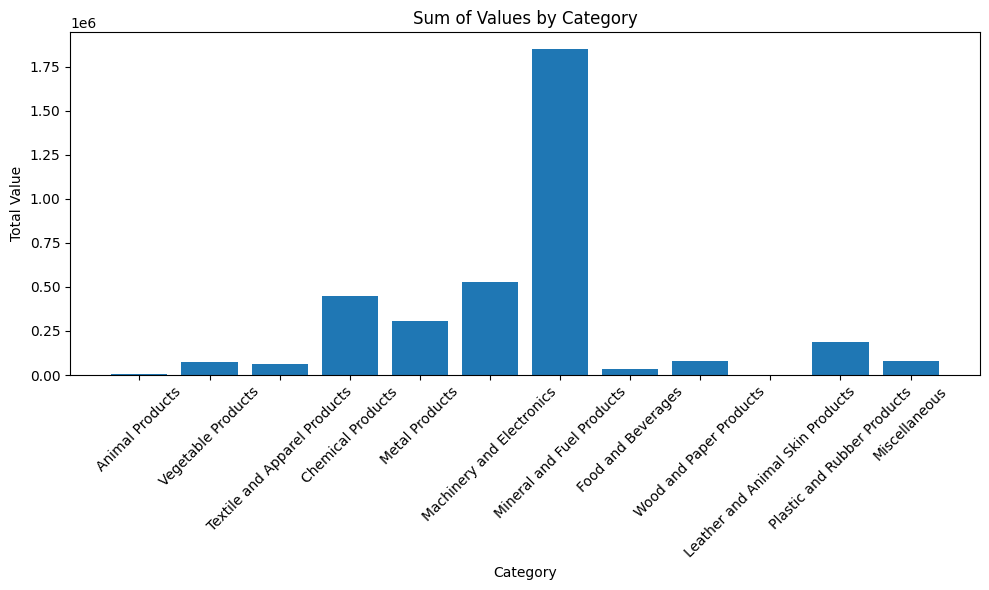

In [ ]:
# Calculate sum of values for each category
category_sums = idf.groupBy().agg(*[sum(when(col(category), col("value")).otherwise(0)).alias(category) for category in category_groups.keys()])

# Collect results for plotting
category_data = category_sums.toPandas().iloc[0].to_dict()

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_data.keys(), category_data.values())
plt.title("Sum of Values by Category")
plt.xlabel("Category")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


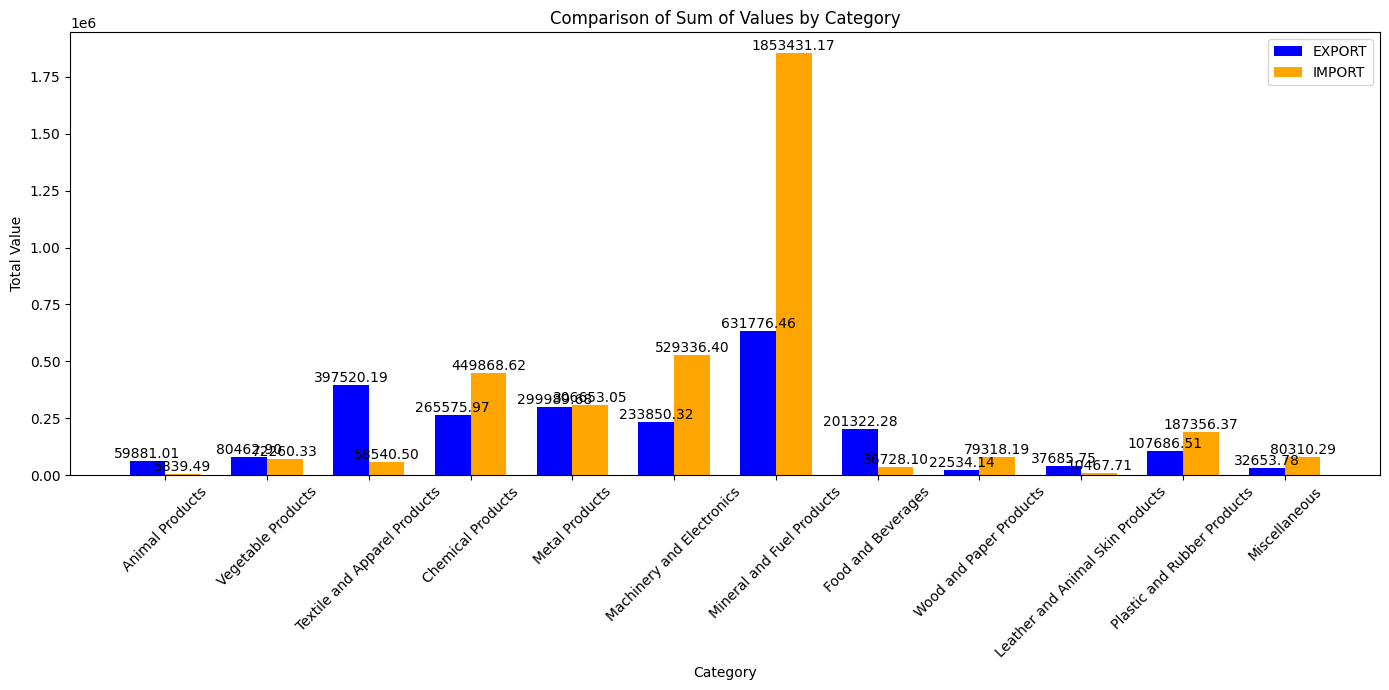

In [41]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Function to calculate sums for each category
def calculate_category_sums(df, value_col):
    category_sums = df.groupBy().agg(
        *[F.sum(F.when(F.col("Commodity").isin(items), F.col(value_col)).otherwise(0)).alias(category)
          for category, items in category_groups.items()]
    )
    return category_sums

# Calculate sums for edf and idf
edf_sums = calculate_category_sums(edf, "value")
idf_sums = calculate_category_sums(idf, "value")

# Collect results for comparison
edf_data = edf_sums.toPandas().iloc[0].to_dict()
idf_data = idf_sums.toPandas().iloc[0].to_dict()

# Convert data to list of tuples for easier plotting
categories = list(category_groups.keys())
edf_values = [edf_data.get(cat, 0) for cat in categories]
idf_values = [idf_data.get(cat, 0) for cat in categories]

# Create bar chart
x = range(len(categories))
width = 0.35

plt.figure(figsize=(14, 7))
edf_bars = plt.bar(x, edf_values, width=width, label='EXPORT', color='blue', align='center')
idf_bars = plt.bar([p + width for p in x], idf_values, width=width, label='IMPORT', color='orange', align='center')

# Adding values on top of the bars
for edf_bar, value in zip(edf_bars, edf_values):
    plt.text(edf_bar.get_x() + edf_bar.get_width() / 2, edf_bar.get_height(),
             f'{value:.2f}', ha='center', va='bottom')

for idf_bar, value in zip(idf_bars, idf_values):
    plt.text(idf_bar.get_x() + idf_bar.get_width() / 2, idf_bar.get_height(),
             f'{value:.2f}', ha='center', va='bottom')

plt.xlabel("Category")
plt.ylabel("Total Value")
plt.title("Comparison of Sum of Values by Category")
plt.xticks([p + width/2 for p in x], categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


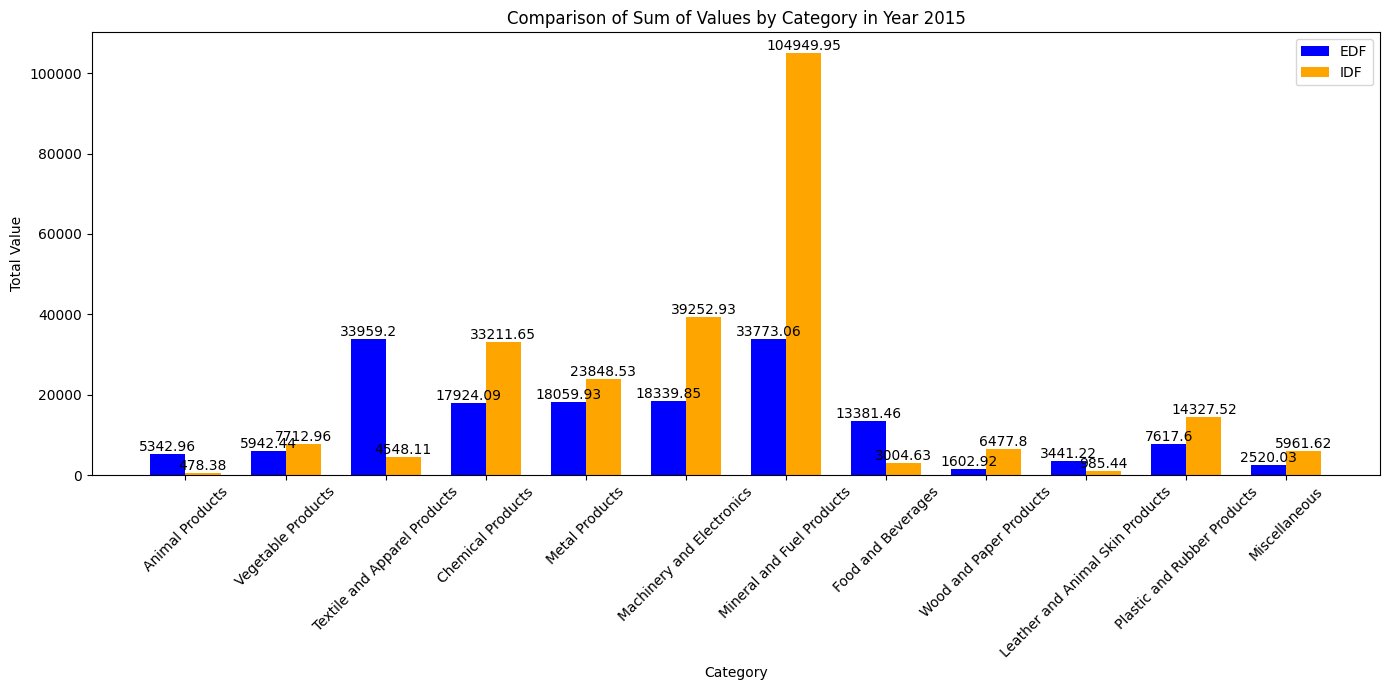

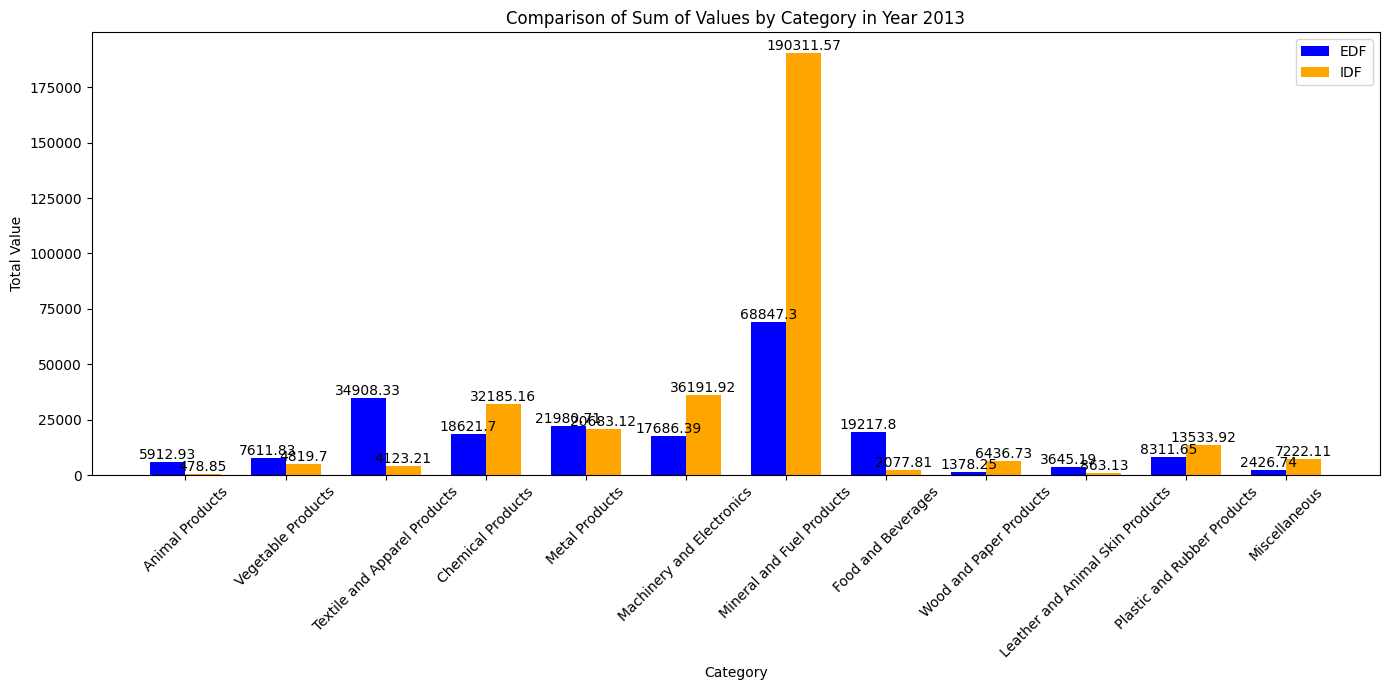

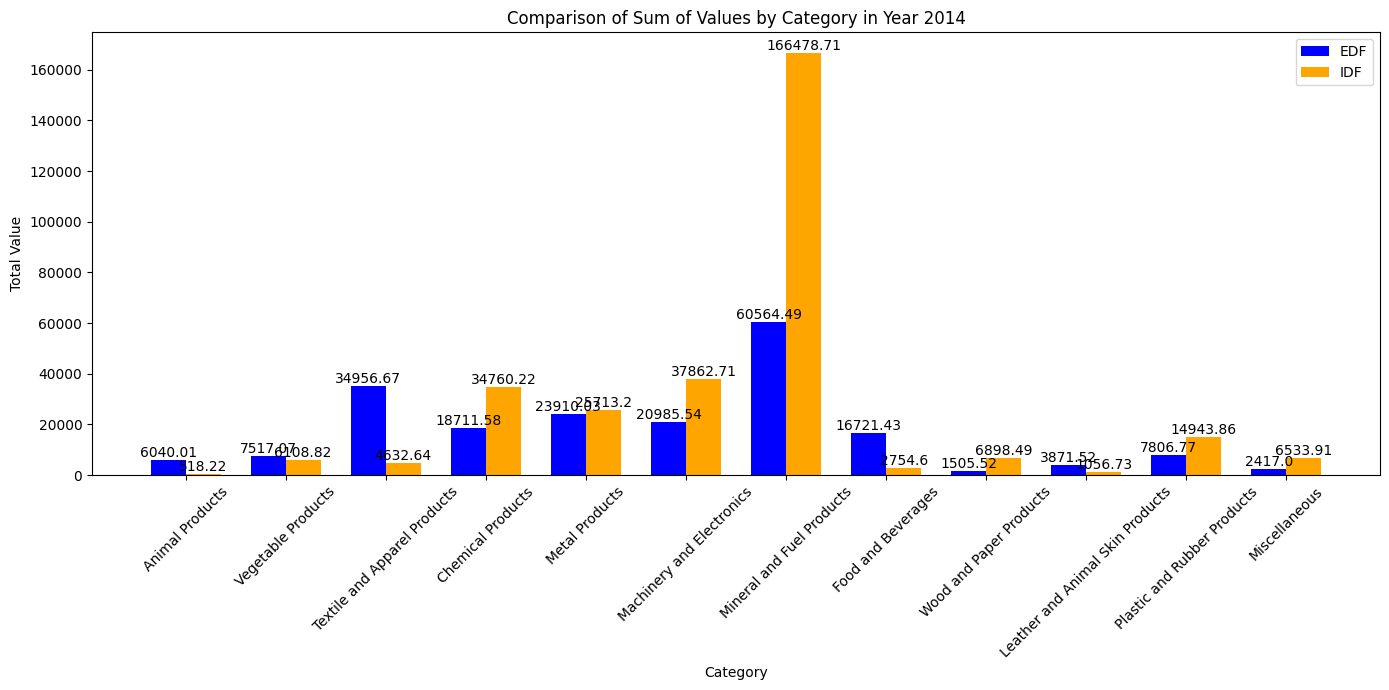

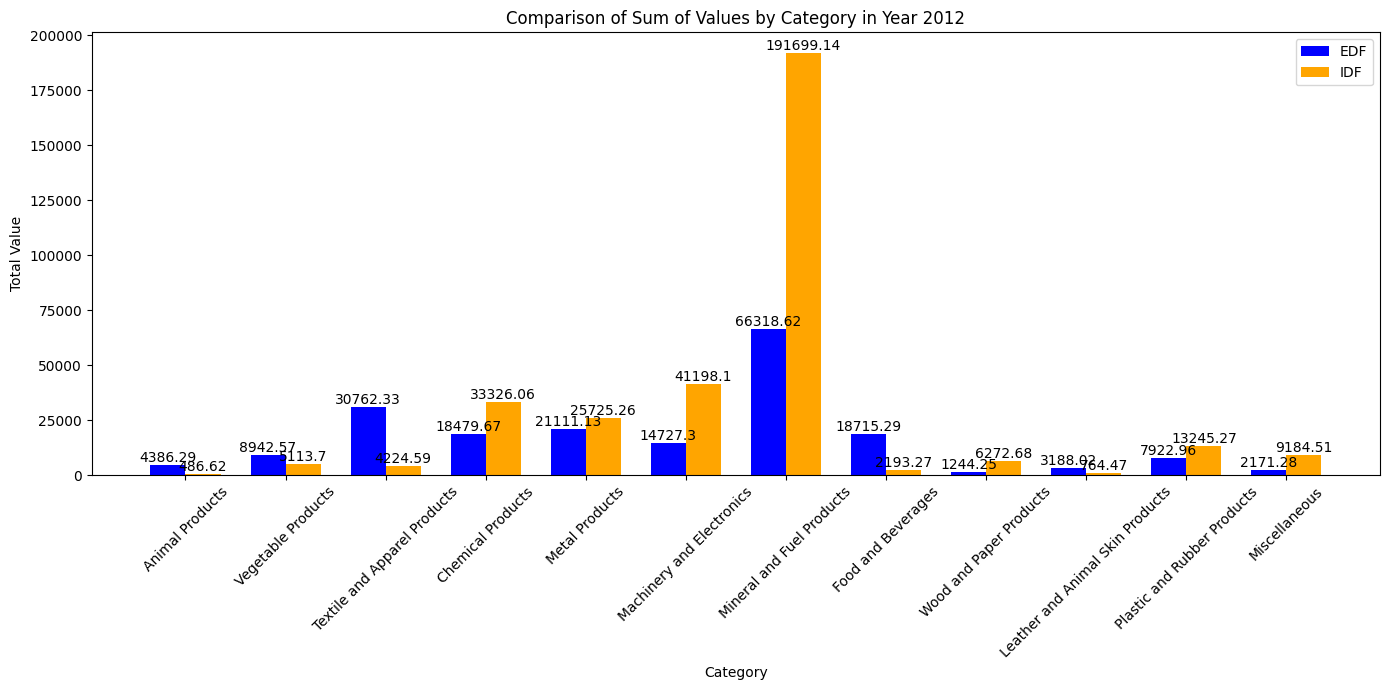

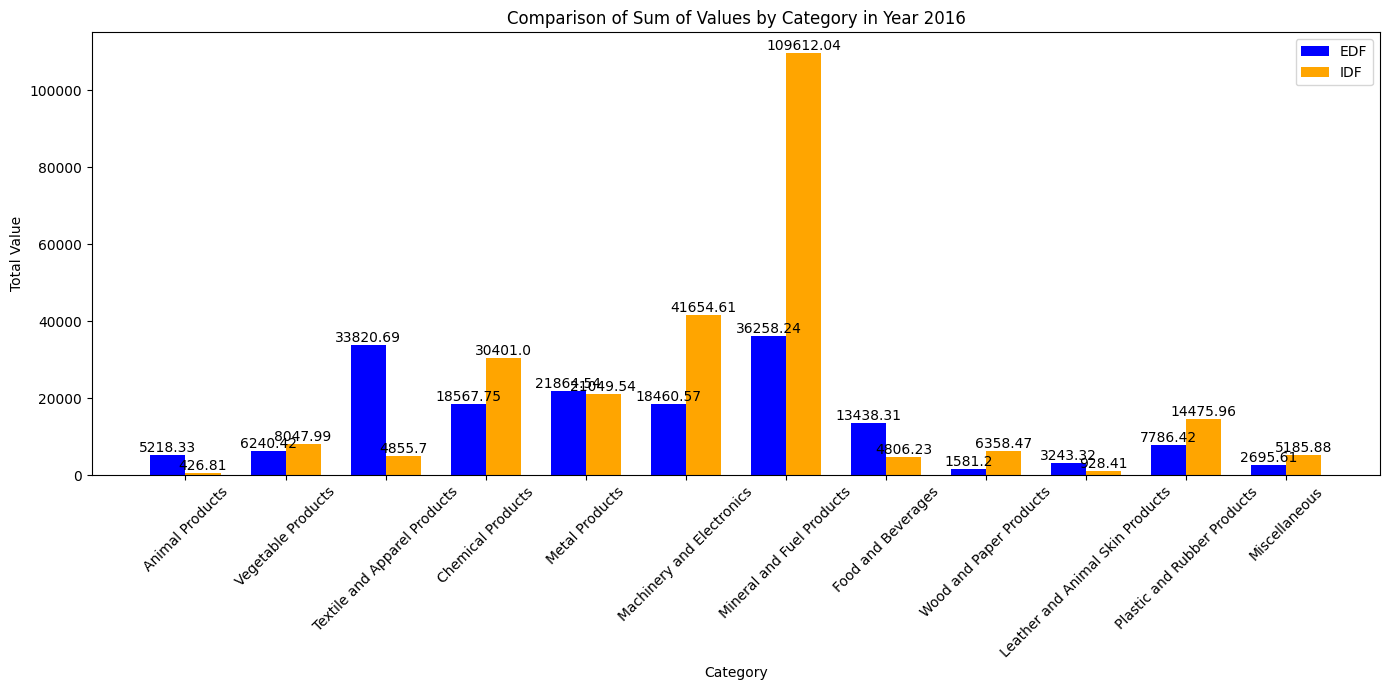

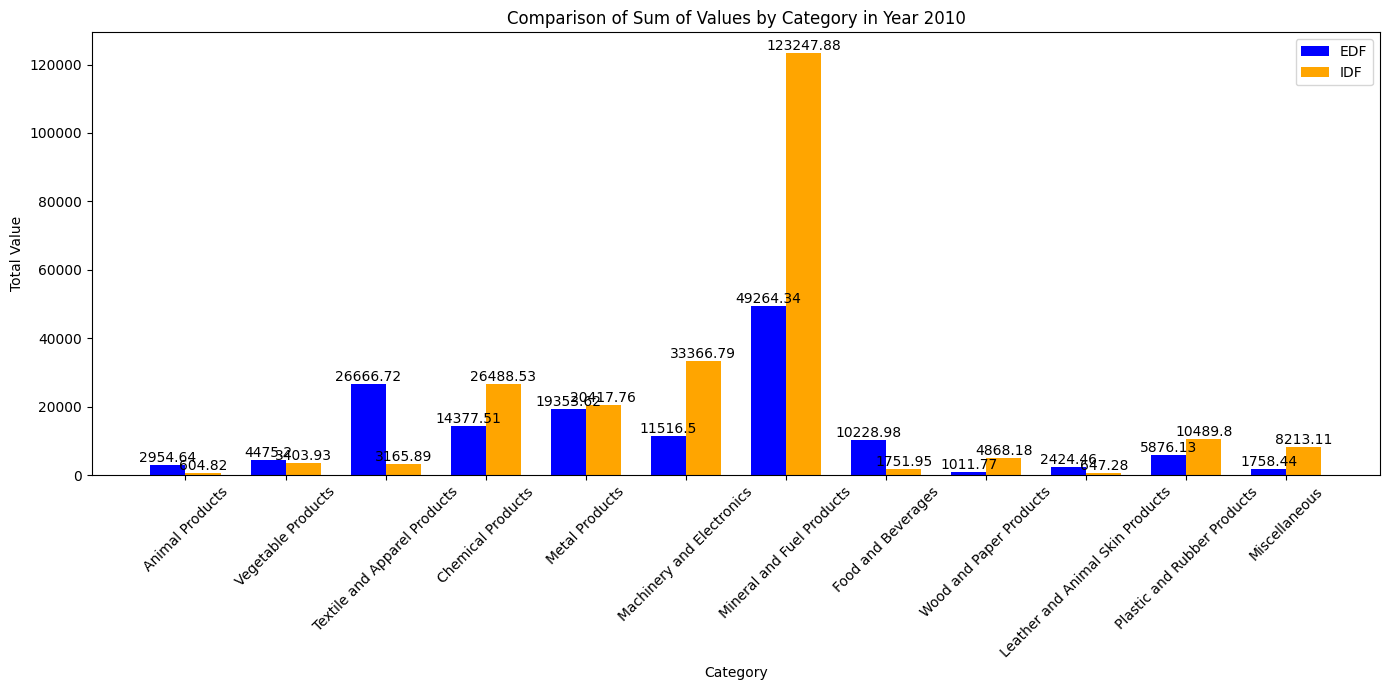

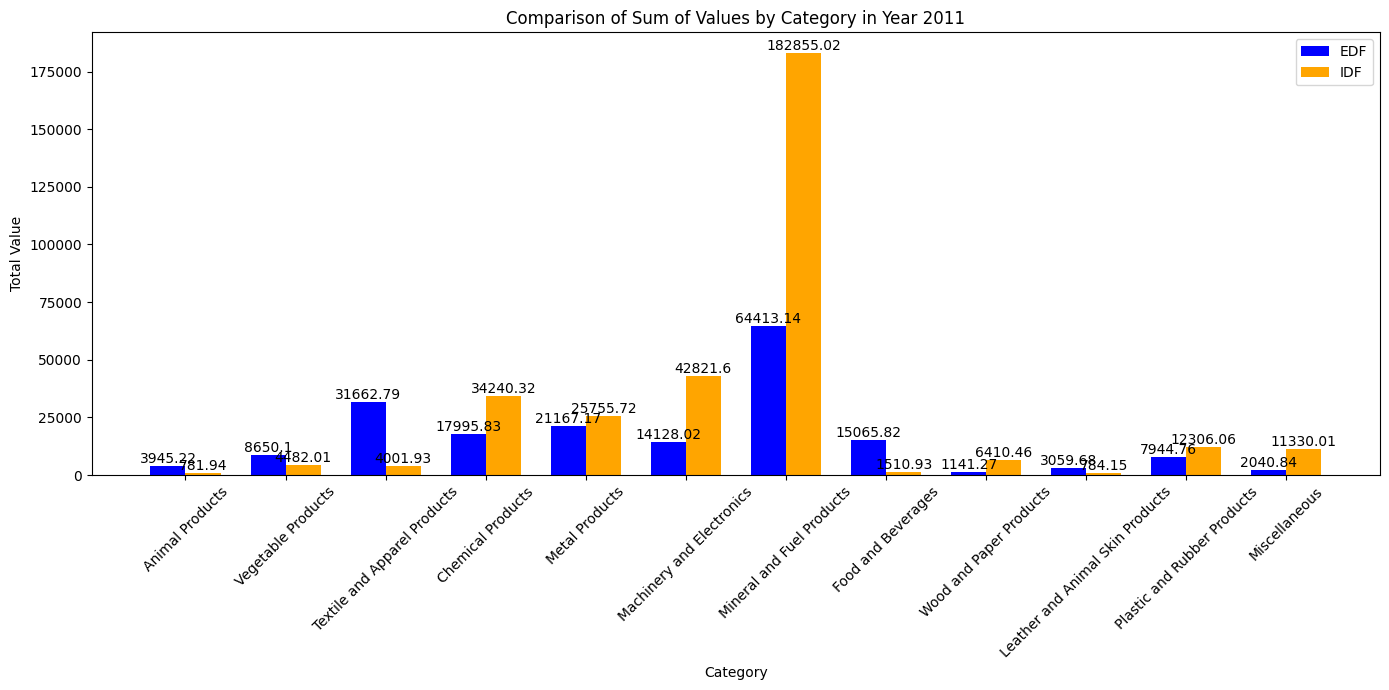

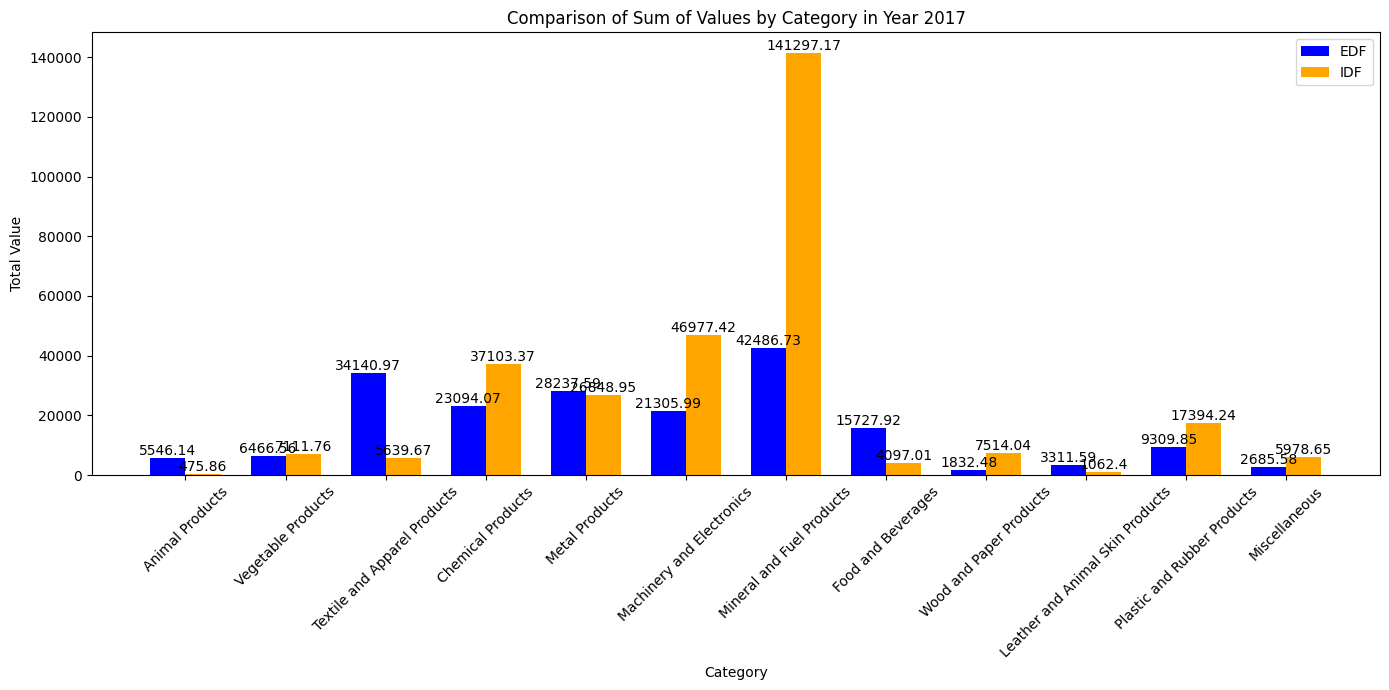

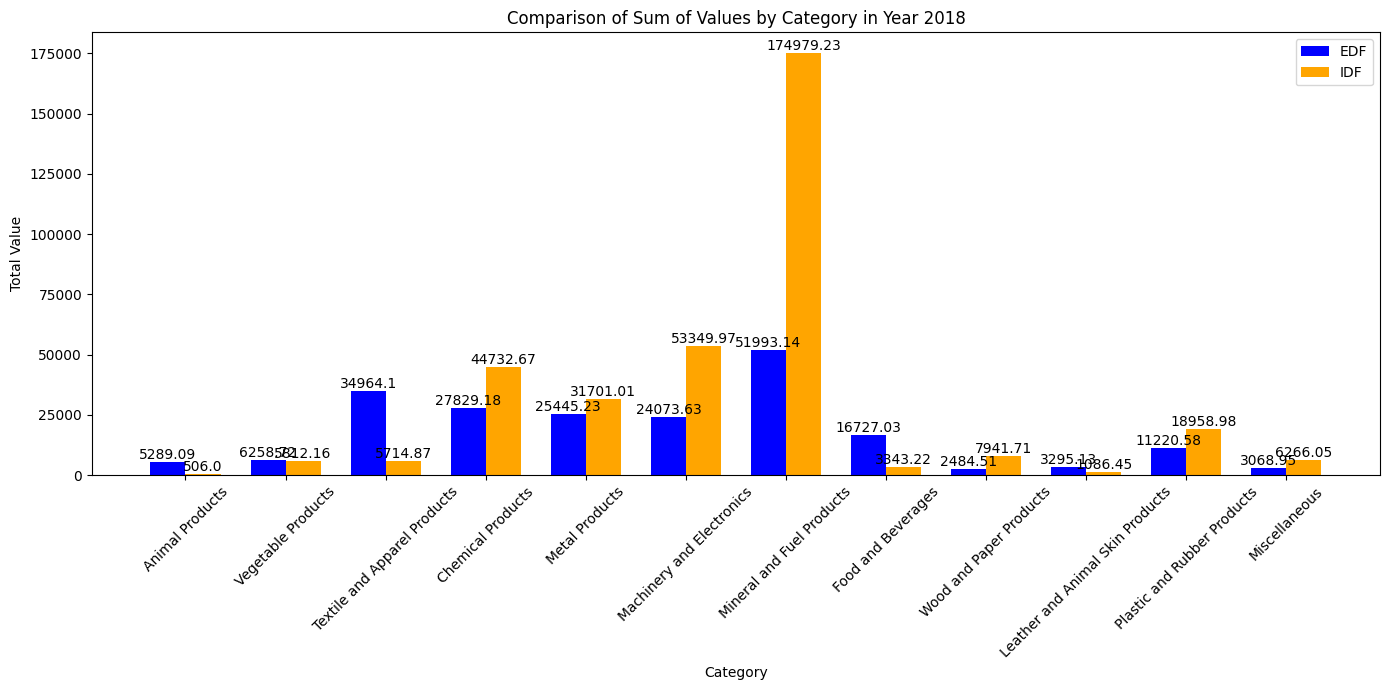

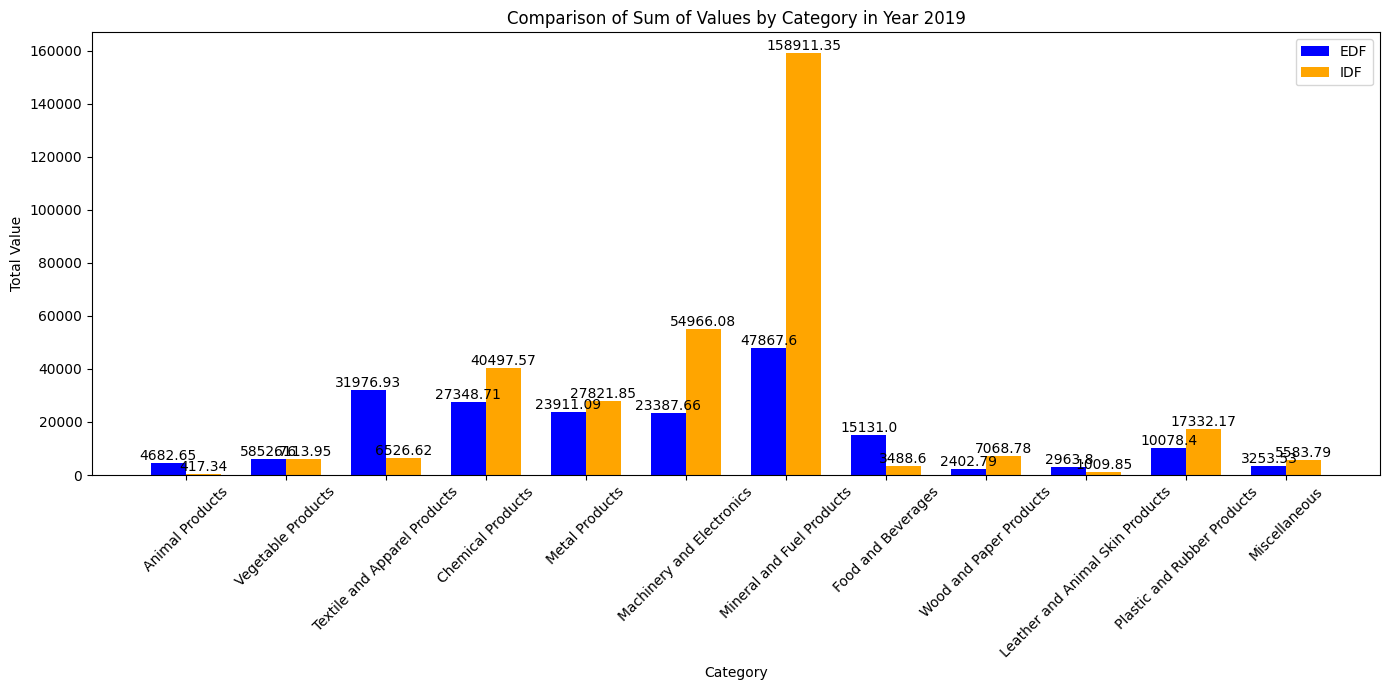

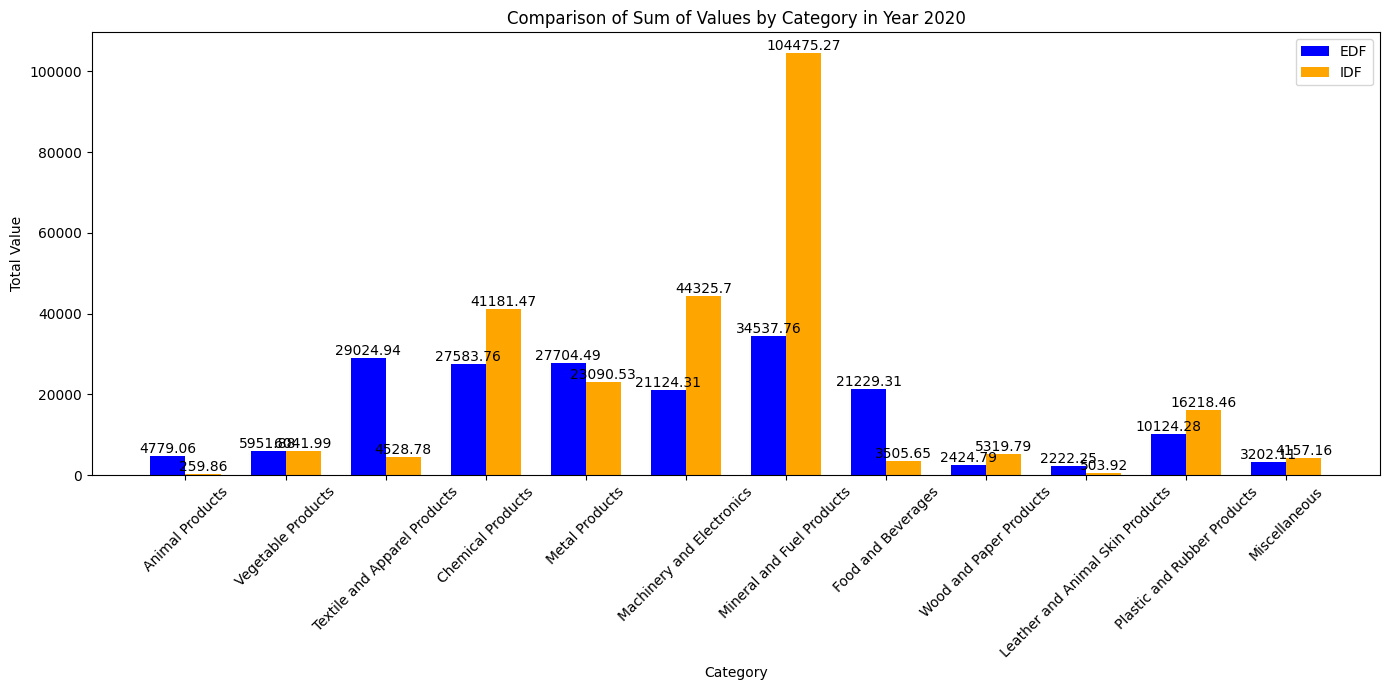

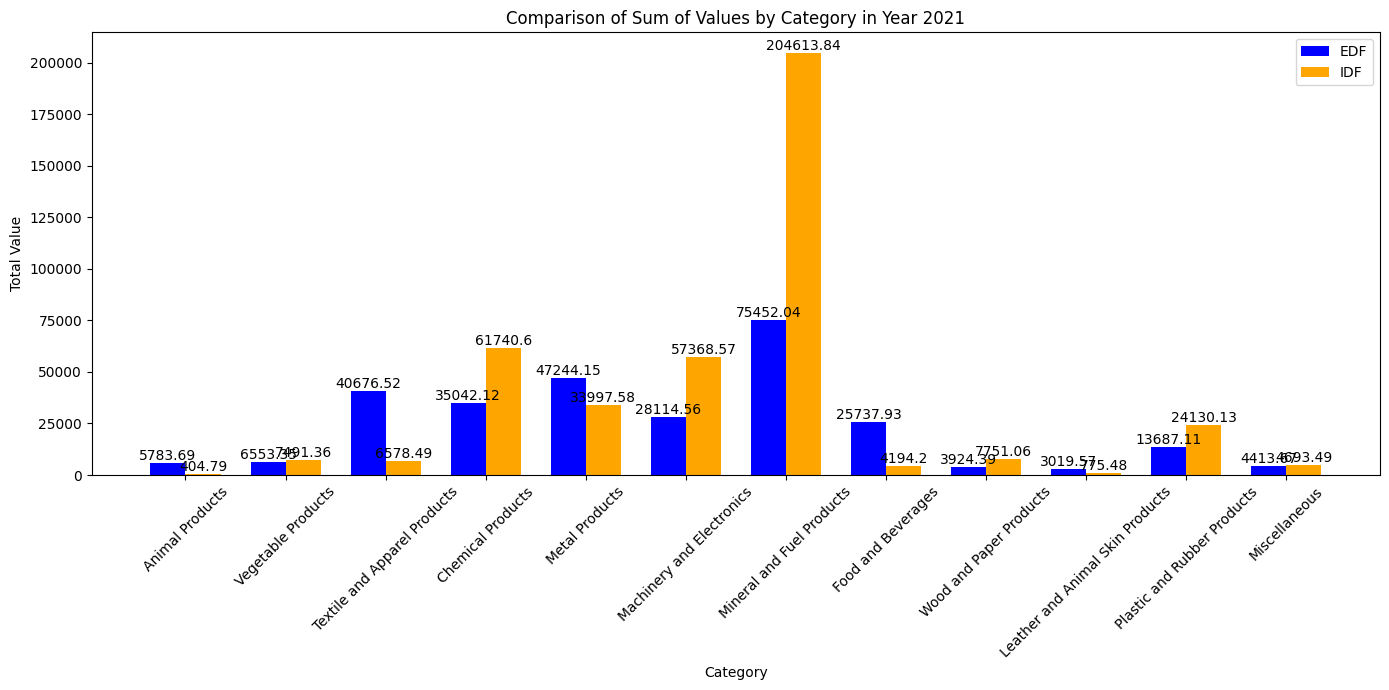

In [ ]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate sums for each category grouped by year
def calculate_category_sums_by_year(df, value_col, year_col):
    return df.groupBy(year_col).agg(
        *[F.sum(F.when(F.col("Commodity").isin(items), F.col(value_col)).otherwise(0)).alias(category)
          for category, items in category_groups.items()]
    )

# Calculate sums for edf and idf grouped by year
edf_sums_by_year = calculate_category_sums_by_year(edf, "value", "year")
idf_sums_by_year = calculate_category_sums_by_year(idf, "value", "year")

# Collect results for comparison
edf_pandas = edf_sums_by_year.toPandas()
idf_pandas = idf_sums_by_year.toPandas()

# Create bar chart for each year
years = edf_pandas["year"].tolist()

for year in years:
    edf_data = edf_pandas[edf_pandas["year"] == year].iloc[0].to_dict()
    idf_data = idf_pandas[idf_pandas["year"] == year].iloc[0].to_dict()

    # Prepare data for plotting
    categories = list(category_groups.keys())
    edf_values = [edf_data.get(cat, 0) for cat in categories]
    idf_values = [idf_data.get(cat, 0) for cat in categories]

    # Create grouped bar chart for each year
    x = np.arange(len(categories))  # the label locations
    width = 0.35  # the width of the bars

    plt.figure(figsize=(14, 7))
    bars_edf = plt.bar(x - width/2, edf_values, width=width, label='EDF', color='blue', align='center')
    bars_idf = plt.bar(x + width/2, idf_values, width=width, label='IDF', color='orange', align='center')

    plt.xlabel("Category")
    plt.ylabel("Total Value")
    plt.title(f"Comparison of Sum of Values by Category in Year {year}")
    plt.xticks(x, categories, rotation=45)
    plt.legend()

    # Add data labels on top of each bar
    for bar in bars_edf:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

    for bar in bars_idf:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


KeyboardInterrupt: 

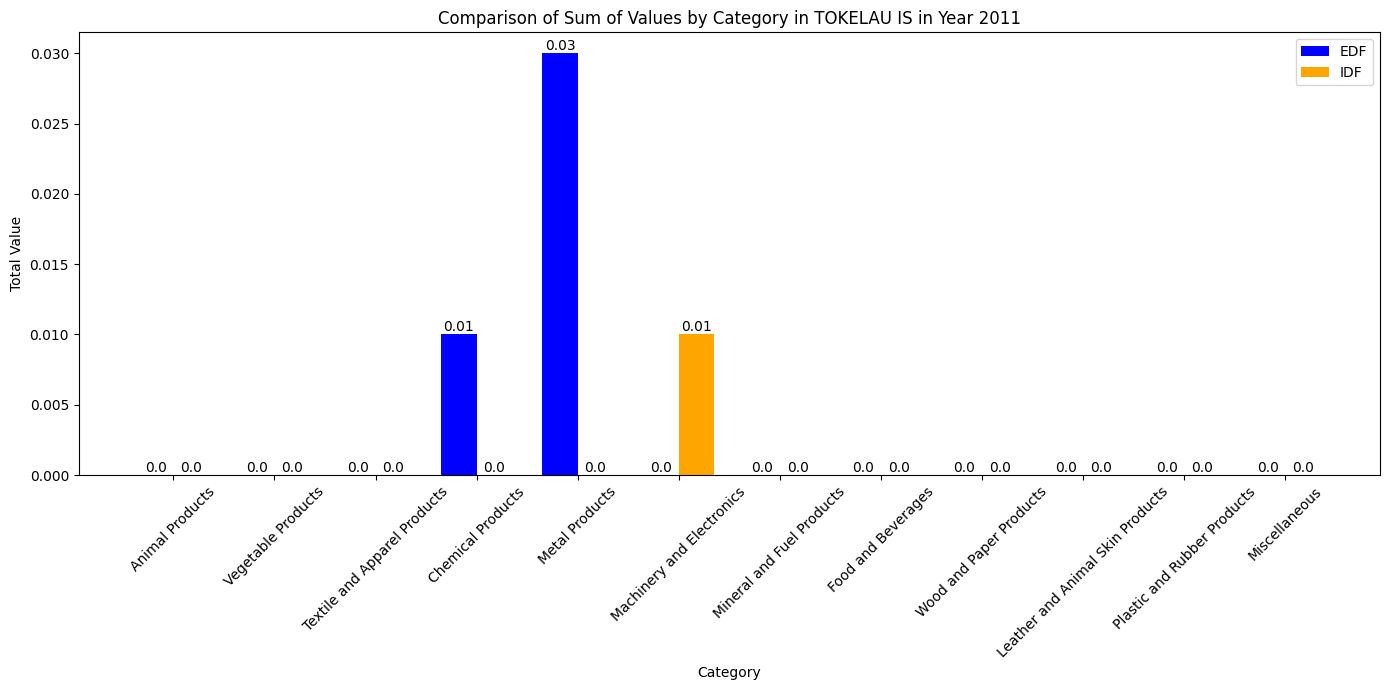

In [42]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import numpy as np
import os

# Example path to save images (replace with your path)
save_path = "/path/to/your/drive/folder"
os.makedirs(save_path, exist_ok=True)

# Function to calculate sums for each category grouped by year and country
def calculate_category_sums_by_year_and_country(df, value_col, year_col, country_col, categories):
    return df.groupBy(year_col, country_col).agg(
        *[F.sum(F.when(F.col(category) == True, F.col(value_col)).otherwise(0)).alias(category)
          for category in categories]
    )

# Assuming 'edf' and 'idf' are your DataFrames and 'categories' contains the one-hot encoded category columns
edf_sums_by_year_country = calculate_category_sums_by_year_and_country(edf, "value", "year", "country", categories)
idf_sums_by_year_country = calculate_category_sums_by_year_and_country(idf, "value", "year", "country", categories)

# Convert Spark DataFrames to Pandas
edf_pandas = edf_sums_by_year_country.toPandas()
idf_pandas = idf_sums_by_year_country.toPandas()

# Get unique years and countries for looping
years = edf_pandas["year"].unique().tolist()
countries = edf_pandas["country"].unique().tolist()

# Create and save bar chart for each year and country
image_paths = []

for year in years:
    for country in countries:
        # Filter data for the current year and country
        edf_data = edf_pandas[(edf_pandas["year"] == year) & (edf_pandas["country"] == country)]
        idf_data = idf_pandas[(idf_pandas["year"] == year) & (idf_pandas["country"] == country)]

        if edf_data.empty or idf_data.empty:
            continue  # Skip if there's no data for this year and country combination

        # Convert to dictionaries for easier plotting
        edf_dict = edf_data.iloc[0].to_dict()
        idf_dict = idf_data.iloc[0].to_dict()

        # Prepare values for plotting
        edf_values = [edf_dict.get(cat, 0) for cat in categories]
        idf_values = [idf_dict.get(cat, 0) for cat in categories]

        # Create bar chart
        x = np.arange(len(categories))  # Label locations
        width = 0.35  # Width of bars

        plt.figure(figsize=(14, 7))
        bars_edf = plt.bar(x - width / 2, edf_values, width=width, label='EDF', color='blue', align='center')
        bars_idf = plt.bar(x + width / 2, idf_values, width=width, label='IDF', color='orange', align='center')

        plt.xlabel("Category")
        plt.ylabel("Total Value")
        plt.title(f"Comparison of Sum of Values by Category in {country} in Year {year}")
        plt.xticks(x, categories, rotation=45)
        plt.legend()

        # Add data labels on top of each bar
        for bar in bars_edf:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), ha='center', va='bottom')

        for bar in bars_idf:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), ha='center', va='bottom')

        plt.tight_layout()

        # Save the plot as an image
        image_filename = f"comparison_{country}_{year}.png"
        image_fullpath = os.path.join(save_path, image_filename)
        plt.savefig(image_fullpath)
        image_paths.append(image_fullpath)
        plt.close()

# Print the paths where the images are saved
print(f"Images saved in folder: {save_path}")


#AAA


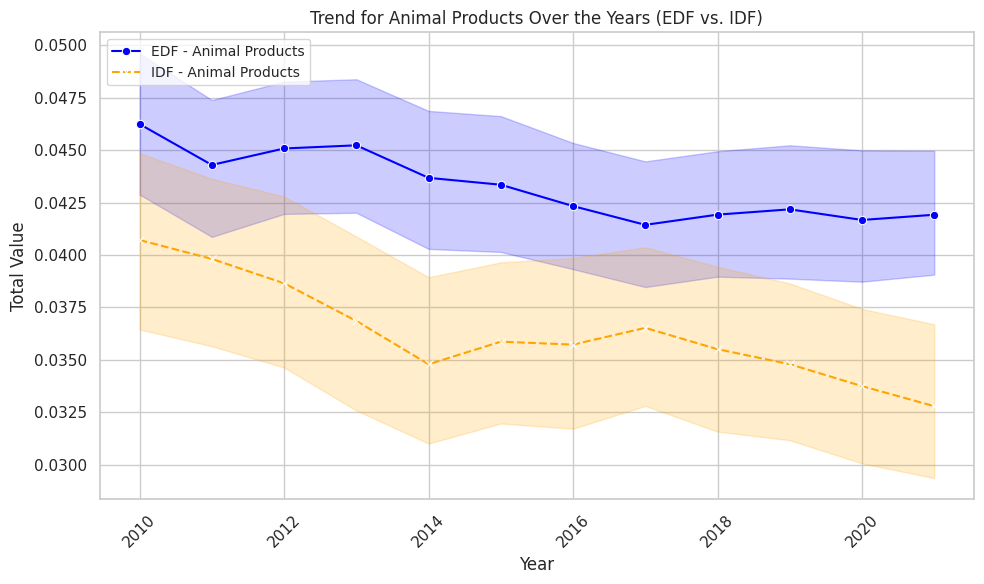

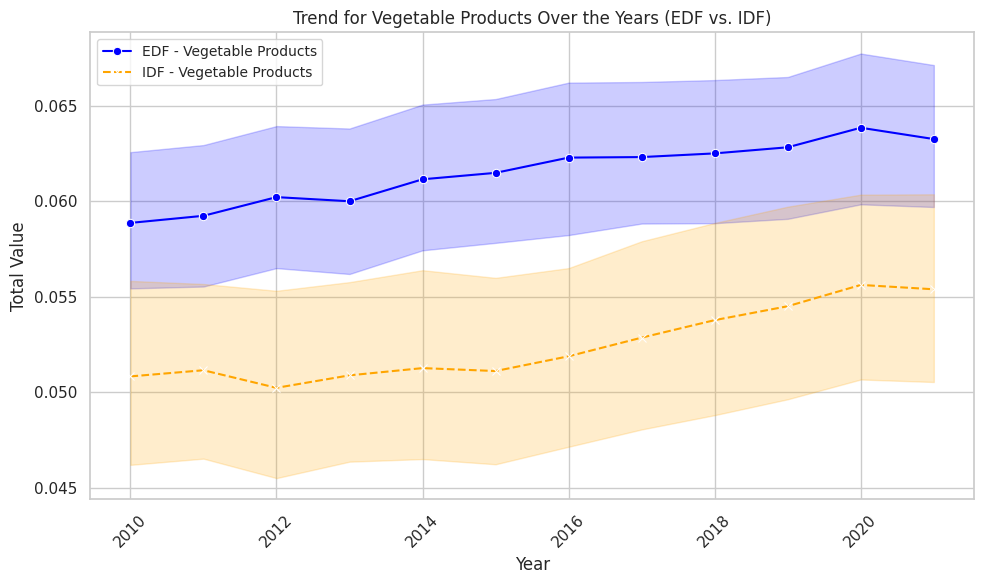

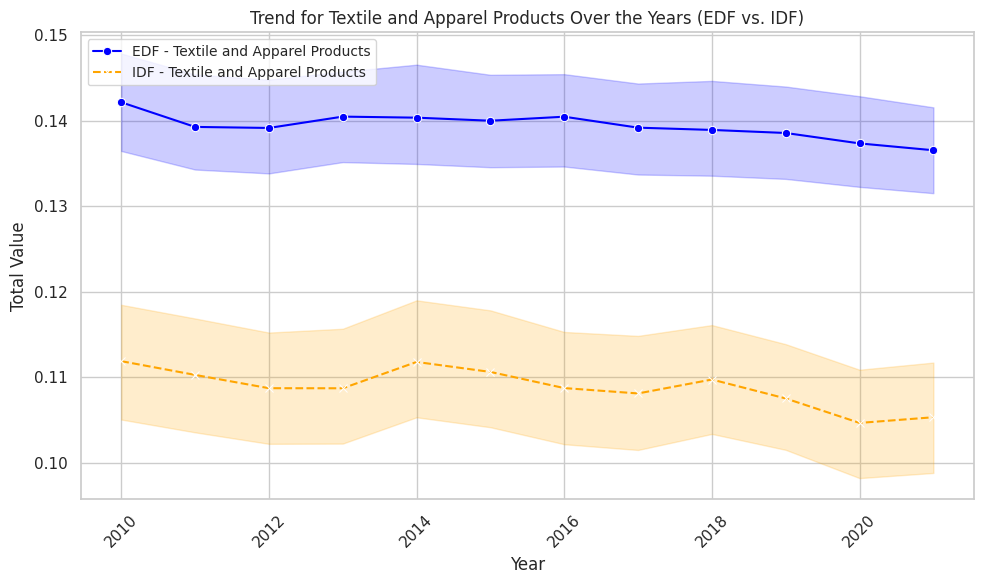

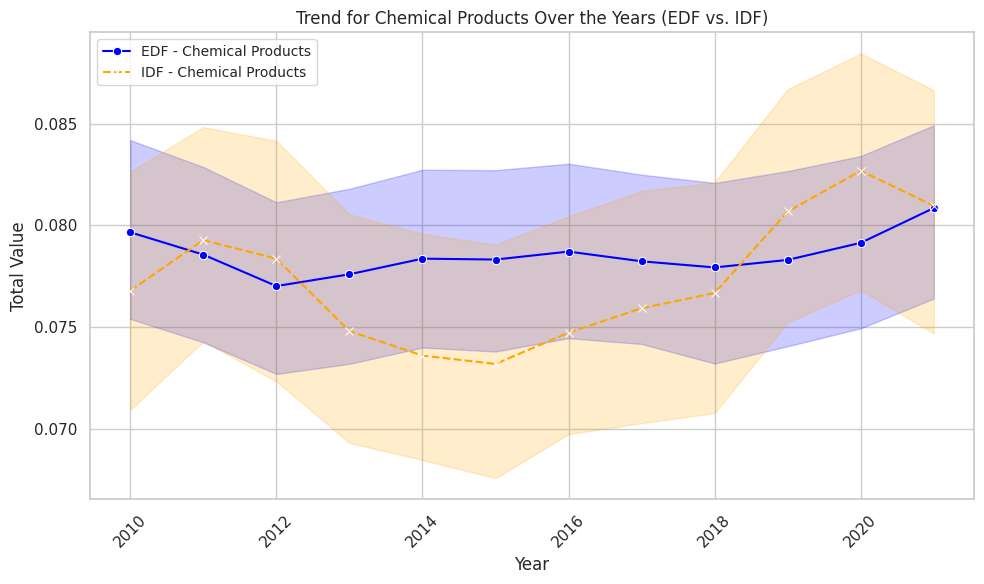

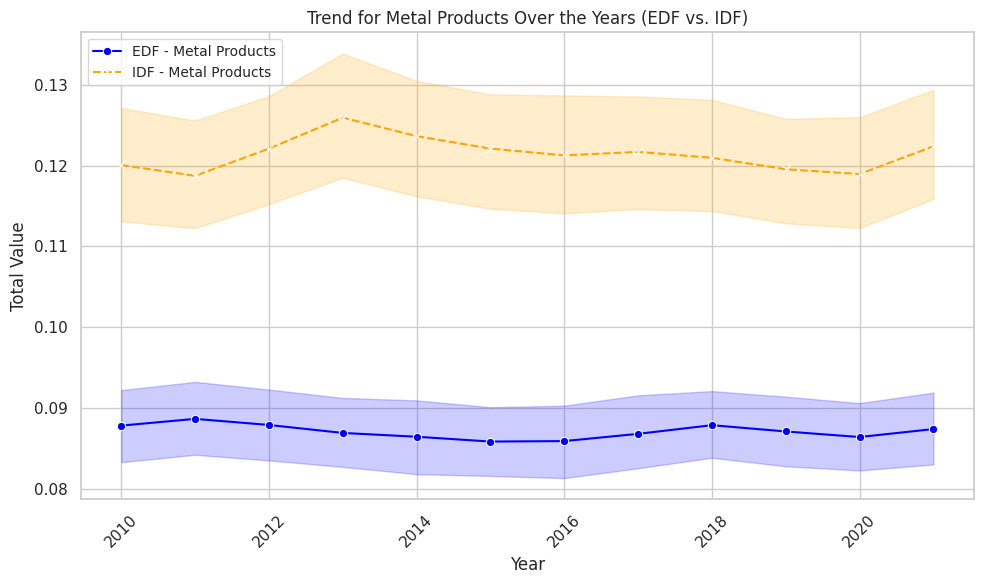

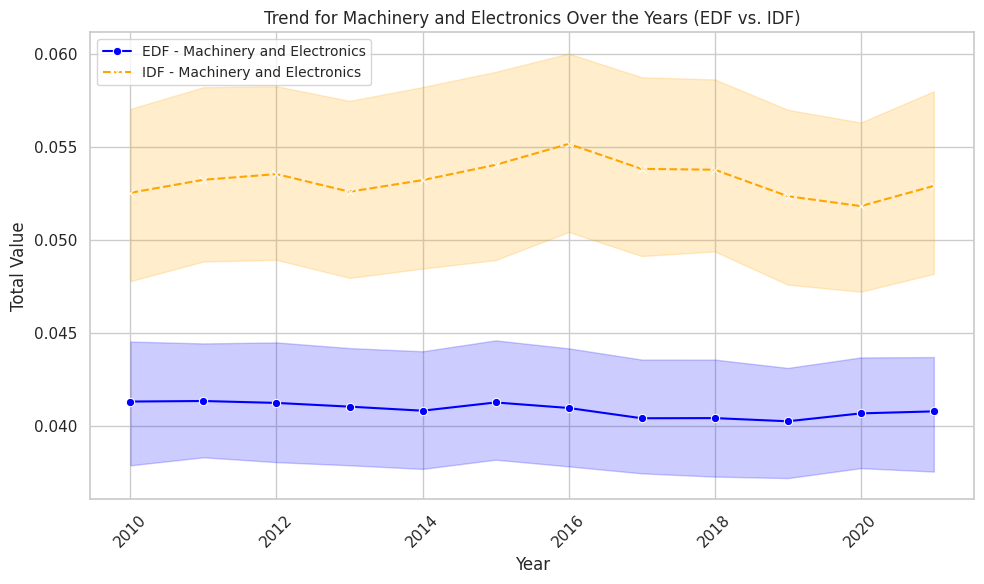

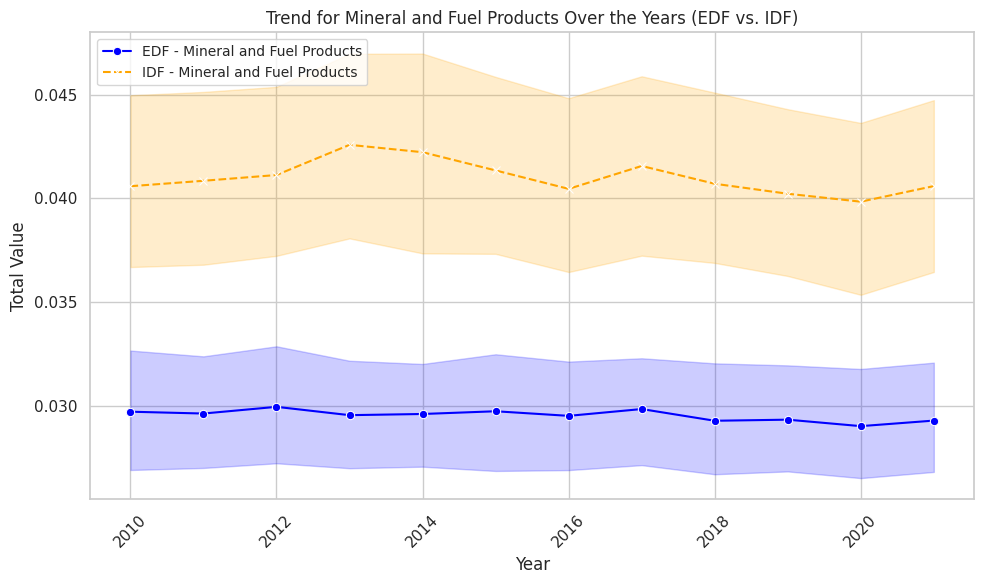

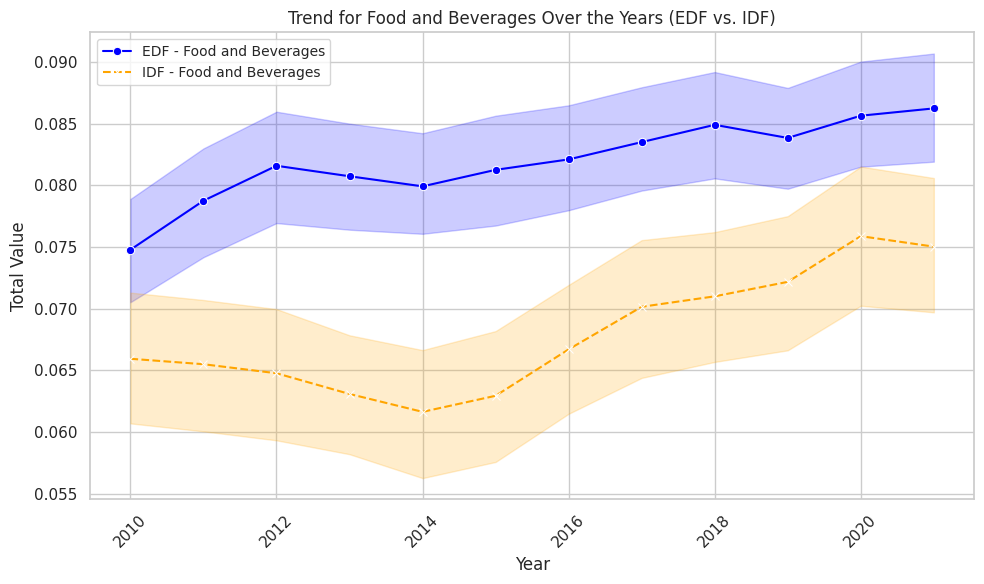

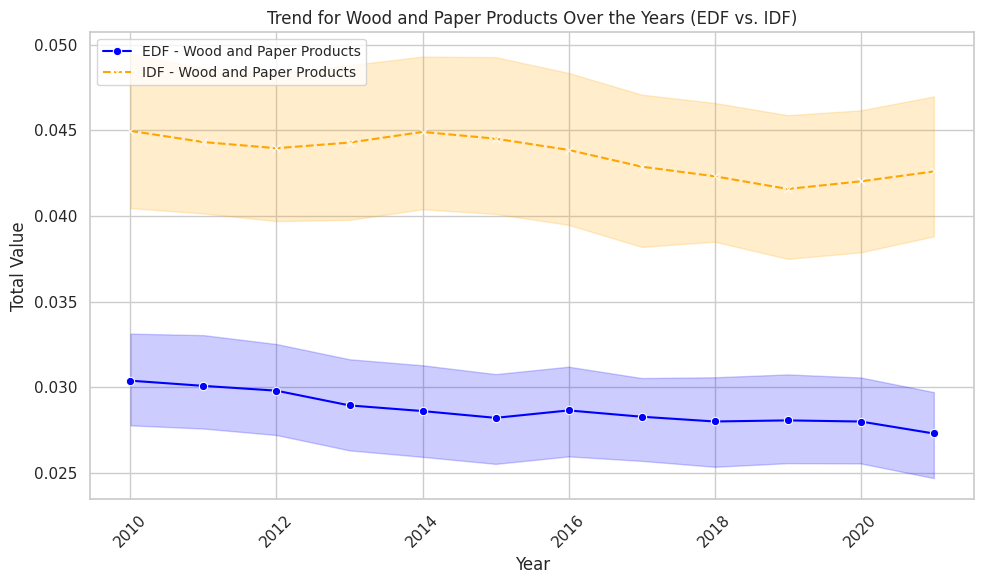

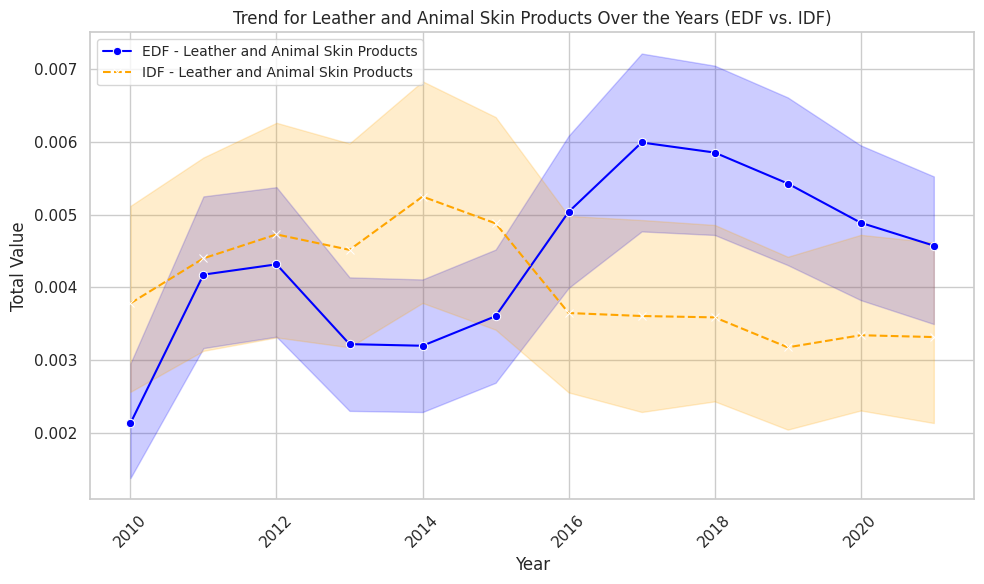

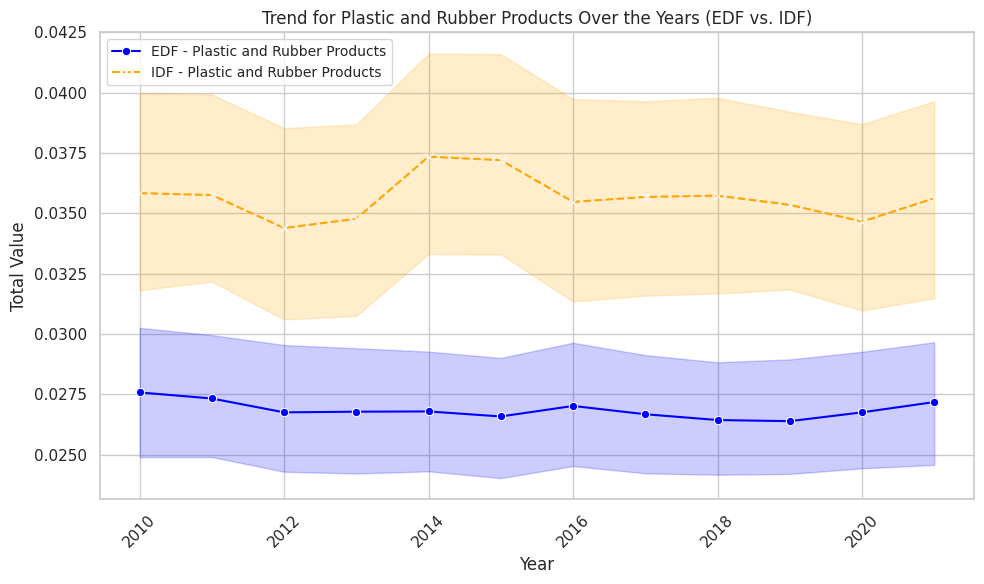

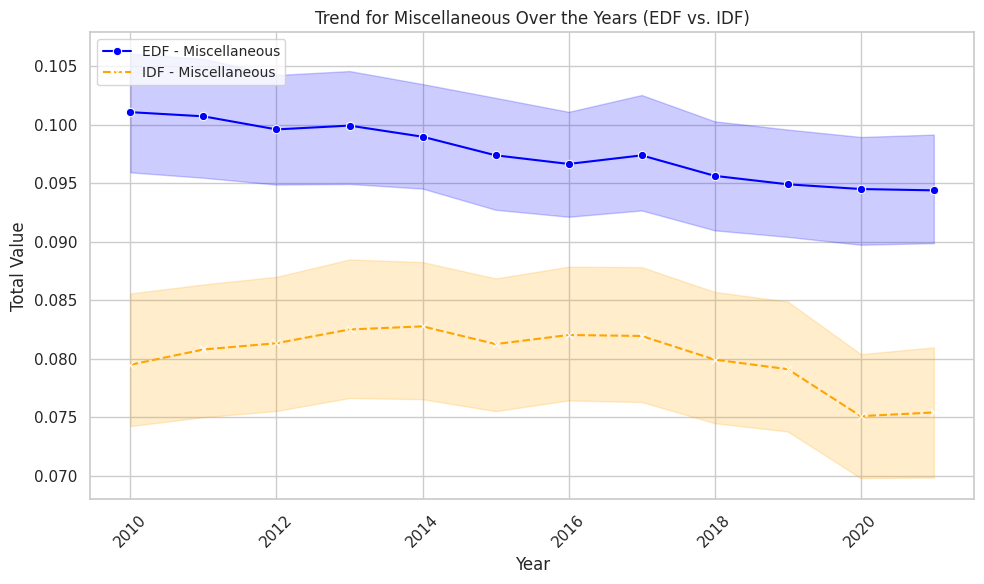

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert PySpark DataFrames to Pandas
edf_pandas = edf.toPandas()
idf_pandas = idf.toPandas()

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through each category and create a separate line chart
for category in categories:
    plt.figure(figsize=(10, 6))

    # Plot EDF values using Seaborn
    sns.lineplot(x="year", y=category, data=edf_pandas, marker='o', label=f'EDF - {category}', color='blue')

    # Plot IDF values using Seaborn
    sns.lineplot(x="year", y=category, data=idf_pandas, marker='x', label=f'IDF - {category}', color='orange', linestyle='--')

    # Add labels, title, and legend
    plt.xlabel("Year")
    plt.ylabel("Total Value")
    plt.title(f"Trend for {category} Over the Years (EDF vs. IDF)")
    plt.xticks(rotation=45)
    plt.legend(loc="upper left", fontsize='small')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a Pandas DataFrame containing year, country, category, and value
df = pd.DataFrame({'year': years, 'country': countries, 'category': categories, 'value': values})

# Create a facet grid for EDF and IDF trends per country
g = sns.FacetGrid(df, col="country", hue="category", col_wrap=3, height=4, aspect=1.5)

# Plot the data as line charts
g.map(sns.lineplot, "year", "value", marker="o")

# Add titles and adjust layout
g.add_legend()
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Category Trends Over the Years by Country")
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


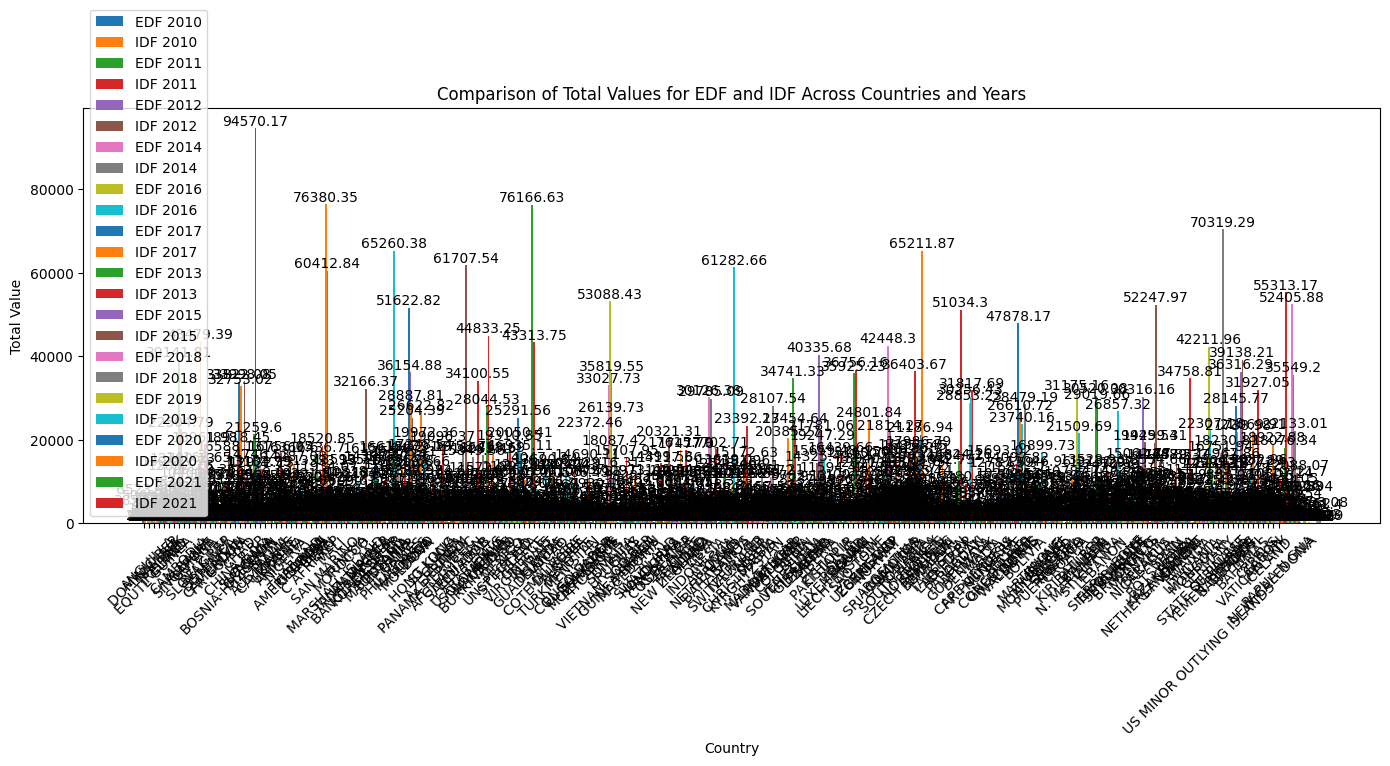

In [51]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import numpy as np
inportpands

def calculate_total_values_by_year_and_country(df, value_col, year_col, country_col):
    return df.groupBy(year_col, country_col).agg(
        F.sum(value_col).alias('total_value')
    )

# Calculate total values for 'edf' and 'idf' DataFrames
edf_total_values = calculate_total_values_by_year_and_country(edf, "value", "year", "country")
idf_total_values = calculate_total_values_by_year_and_country(idf, "value", "year", "country")

# Convert to Pandas for plotting
edf_pandas = edf_total_values.toPandas()
idf_pandas = idf_total_values.toPandas()

# Merge the dataframes on year and country
merged_df = pd.merge(edf_pandas, idf_pandas, on=["year", "country"], suffixes=('_edf', '_idf'))

# Get unique years
years = merged_df["year"].unique()

# Create a single plot for all years
plt.figure(figsize=(14, 7))
width = 0.35  # width of the bars

for i, year in enumerate(years):
    year_data = merged_df[merged_df["year"] == year]

    x = np.arange(len(year_data["country"]))  # label locations
    bars_edf = plt.bar(x - width/2 + i * width, year_data["total_value_edf"], width=width, label=f'EDF {year}', align='center')
    bars_idf = plt.bar(x + width/2 + i * width, year_data["total_value_idf"], width=width, label=f'IDF {year}', align='center')

    # Add data labels on top of each bar
    for bar in bars_edf:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

    for bar in bars_idf:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("Country")
plt.ylabel("Total Value")
plt.title("Comparison of Total Values for EDF and IDF Across Countries and Years")
plt.xticks(np.arange(len(year_data["country"])), year_data["country"], rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


#Save


In [ ]:
save_path = "/path/to/your/drive/folder"
os.makedirs(save_path, exist_ok=True)